# importing Libraries

In [4]:
#importing important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [5]:
#setting max display limit to 30
pd.set_option("display.max_columns",30)

In [12]:
import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [13]:
#Read the dataset "Online Retail"
retail_df = pd.read_excel('Online Retail.xlsx')
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [14]:
# shape of dataset
retail_df.shape

(541909, 8)

# Data Wrangling

In [15]:
#checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
#Let us check null value count
retail_df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

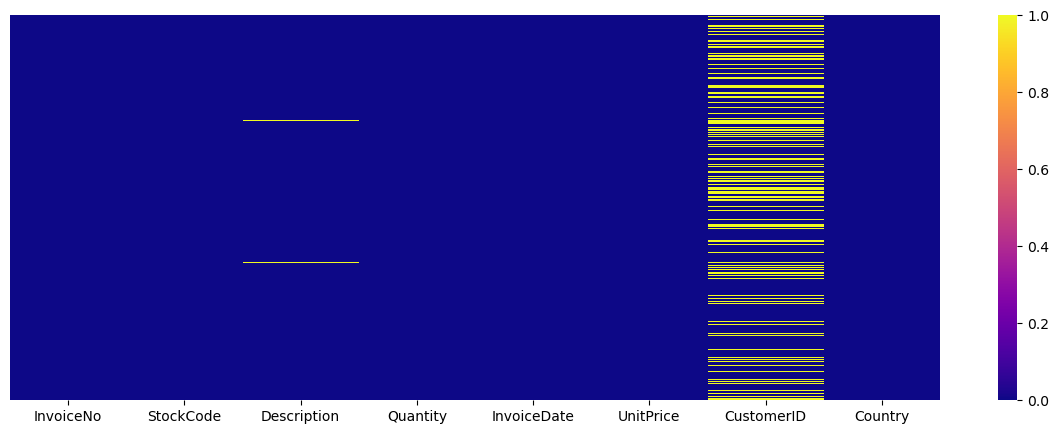

In [10]:
#visualizing null values using heatmap
plt.figure(figsize=(15,5))
sns.heatmap(retail_df.isnull(),cmap='plasma', annot=False, yticklabels=False)
plt.titles=('Visualising Missing Values')

In [16]:
retail_df.dropna(inplace=True)

In [17]:
retail_df.shape

(406829, 8)

In [18]:
retail_df.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cu

In [21]:
# dataframe have negative values in quantity
# here we observed that Invoice number starting with C has negative values and as per description of the data those are cancellations. so we need to drop this entries.
retail_df[retail_df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8905 rows x 8 columns]

In [22]:
#changing datatype to string
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')

In [23]:
#also if your invoice number is starting from C this means we have choose cancellation of entries
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [24]:
#checking how many values are present for unitprice==0
# almost 40 values are present
len(retail_df[retail_df['UnitPrice']==0])

40

In [25]:
#taking unit price values greater than zero
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [26]:
retail_df.describe()

Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

In [27]:
retail_df.shape

(397884, 8)

# Feature Engineering

In [29]:
#Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26
retail_df['InvoiceDate']=pd.to_datetime(retail_df['InvoiceDate'], format="%d-%m-%y %H:%M")

In [30]:
retail_df["year"] = retail_df['InvoiceDate'].apply(lambda x:x.year)
retail_df["month_num"] = retail_df['InvoiceDate'].apply(lambda x:x.month)
retail_df["day_num"] = retail_df['InvoiceDate'].apply(lambda x:x.day)
retail_df["hour"] = retail_df['InvoiceDate'].apply(lambda x:x.hour)
retail_df["minute"] = retail_df['InvoiceDate'].apply(lambda x:x.minute)

In [31]:
#extracting month from invoice date
retail_df["Month"] = retail_df['InvoiceDate'].dt.month_name()

In [32]:
#extracting Day from invoice date
retail_df["Day"] = retail_df['InvoiceDate'].dt.day_name()

In [33]:
retail_df["TotalAmount"] = retail_df["Quantity"]*retail_df["UnitPrice"]

In [26]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount  
0        1     8      26  December  Wednesday        15.30  
1        1     8      26  December  Wednesday        20.34  
2        1     8      26  December  Wednesday        22.00  
3        1     8      26  December  Wednesday        20.34  
4        1     8      26  December  Wednesday        20.34

# EDA(Exploratory Data Analysis)

In [34]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

In [35]:
top_10_product = retail_df['Description'].value_counts().reset_index().rename(columns = {'index':'Product_name','Description':'Counts'}).head(10)
top_10_product

Product_name  Counts
0  WHITE HANGING HEART T-LIGHT HOLDER    2028
1            REGENCY CAKESTAND 3 TIER    1723
2             JUMBO BAG RED RETROSPOT    1618
3       ASSORTED COLOUR BIRD ORNAMENT    1408
4                       PARTY BUNTING    1396
5             LUNCH BAG RED RETROSPOT    1316
6   SET OF 3 CAKE TINS PANTRY DESIGN     1159
7             LUNCH BAG  BLACK SKULL.    1105
8                             POSTAGE    1099
9     PACK OF 72 RETROSPOT CAKE CASES    1068

Text(0.5, 1.0, 'Top 10 Products')

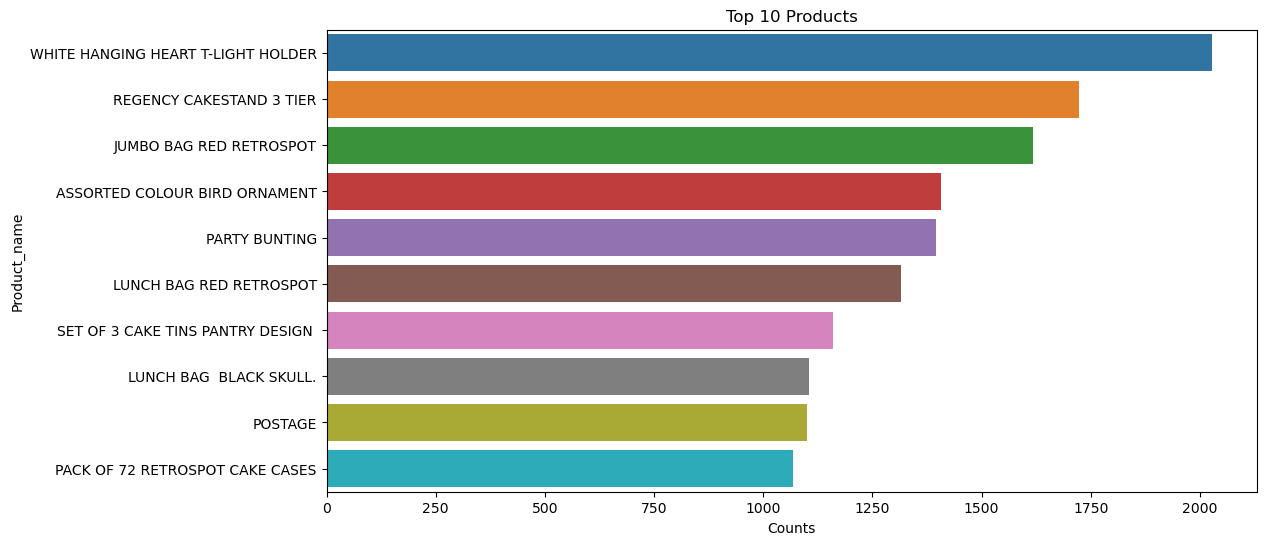

In [36]:
#top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_product['Counts'],y=top_10_product['Product_name'])
plt.title('Top 10 Products')

In [37]:
#Bottom 10 items
bottom_10_product = retail_df['Description'].value_counts().reset_index().rename(columns = {'index':'Product_name','Description':'Counts'}).tail(10)
bottom_10_product

Product_name  Counts
3867  BLUE FELT HANGING HEART WITH FLOWER       1
3868           GLASS CAKE COVER AND PLATE       1
3869           CRACKED GLAZE EARRINGS RED       1
3870              SCALLOP SHELL SOAP DISH       1
3871     NECKLACE+BRACELET SET PINK DAISY       1
3872          RUBY GLASS CLUSTER EARRINGS       1
3873       PINK CHRYSANTHEMUMS ART FLOWER       1
3874      72 CAKE CASES VINTAGE CHRISTMAS       1
3875         WALL ART , THE MAGIC FOREST        1
3876          PAPER CRAFT , LITTLE BIRDIE       1

Text(0.5, 1.0, 'Bottom 10 Products')

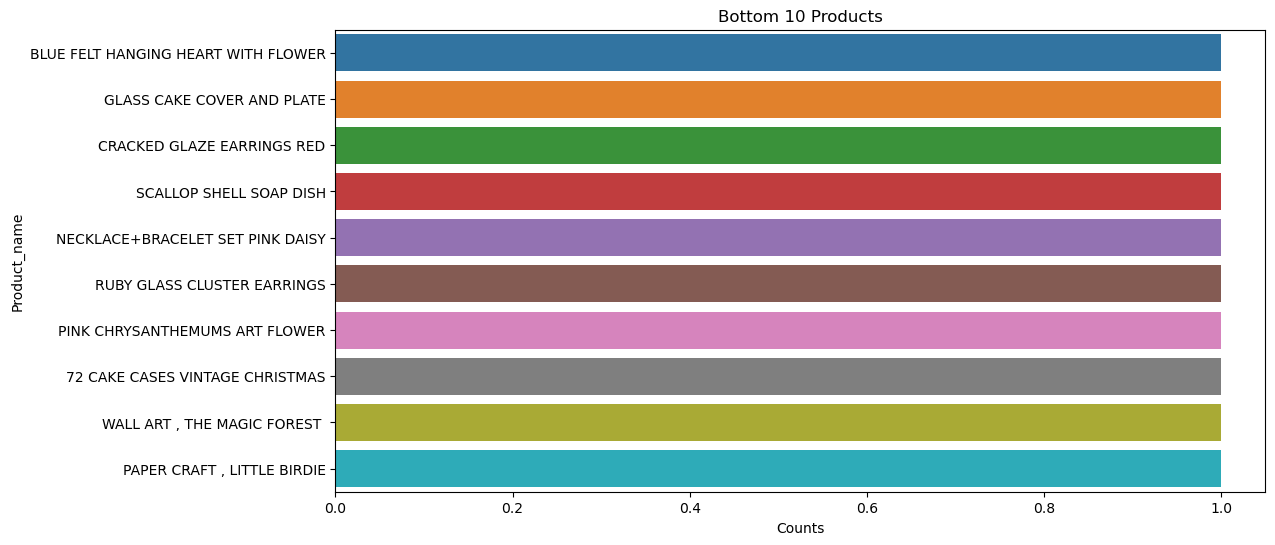

In [38]:
#bottom 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=bottom_10_product['Counts'],y=bottom_10_product['Product_name'])
plt.title('Bottom 10 Products')

In [39]:
top_10_stockCodes = retail_df['StockCode'].value_counts().reset_index().rename(columns = {'index':'StockCode','StockCode':'Counts'}).head(10)
top_10_stockCodes

StockCode  Counts
0    85123A    2035
1     22423    1723
2    85099B    1618
3     84879    1408
4     47566    1396
5     20725    1317
6     22720    1159
7     20727    1105
8      POST    1099
9     23203    1098

Text(0.5, 1.0, 'top 10 product in terms of Stockcodes')

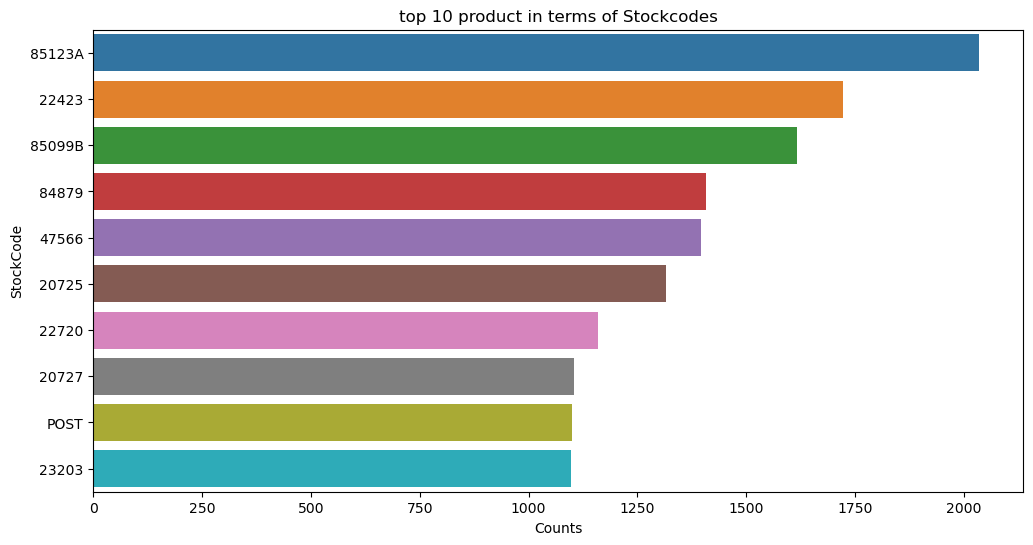

In [33]:
#top 10 product in terms of Stockcodes
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_stockCodes['Counts'],y=top_10_stockCodes['StockCode'])
plt.title('top 10 product in terms of Stockcodes')

In [40]:
top_10_customers = retail_df['CustomerID'].value_counts().reset_index().rename(columns = {'index':'CustomerID','CustomerID':'Products_Parchasing_Counts'}).head(10)
top_10_customers

CustomerID  Products_Parchasing_Counts
0     17841.0                        7847
1     14911.0                        5675
2     14096.0                        5111
3     12748.0                        4595
4     14606.0                        2700
5     15311.0                        2379
6     14646.0                        2076
7     13089.0                        1818
8     13263.0                        1677
9     14298.0                        1637

Text(0.5, 1.0, 'top 10 frequent customers')

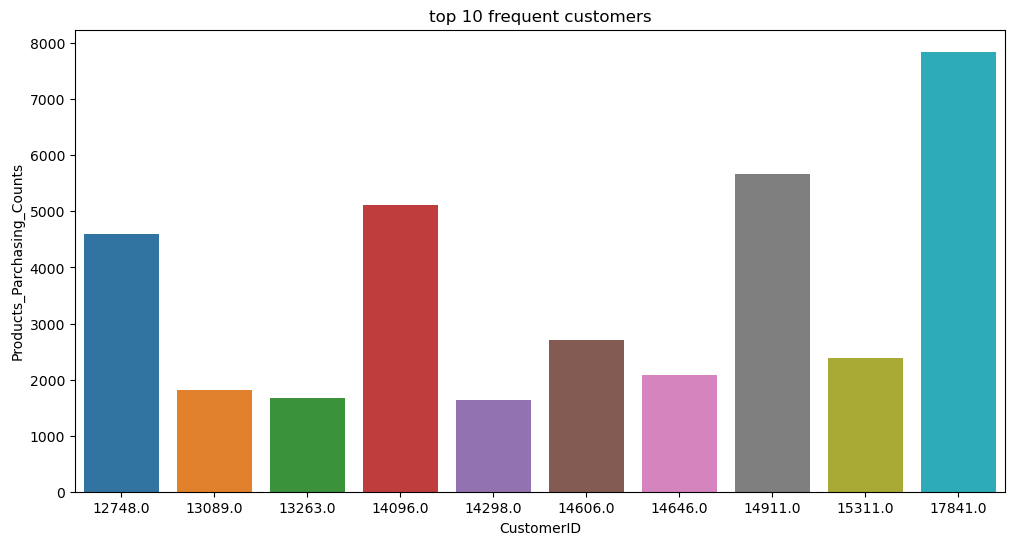

In [41]:
#top 10 frequent customers
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_Parchasing_Counts'].head(10))
plt.title('top 10 frequent customers')

In [42]:
top_5_countries = retail_df['Country'].value_counts().reset_index().rename(columns = {'index':'Country','Country':'Customer_count'}).head(5)
top_5_countries

Country  Customer_count
0  United Kingdom          354321
1         Germany            9040
2          France            8341
3            EIRE            7236
4           Spain            2484

Text(0.5, 1.0, 'top 5 countries based on highest nuber of customers')

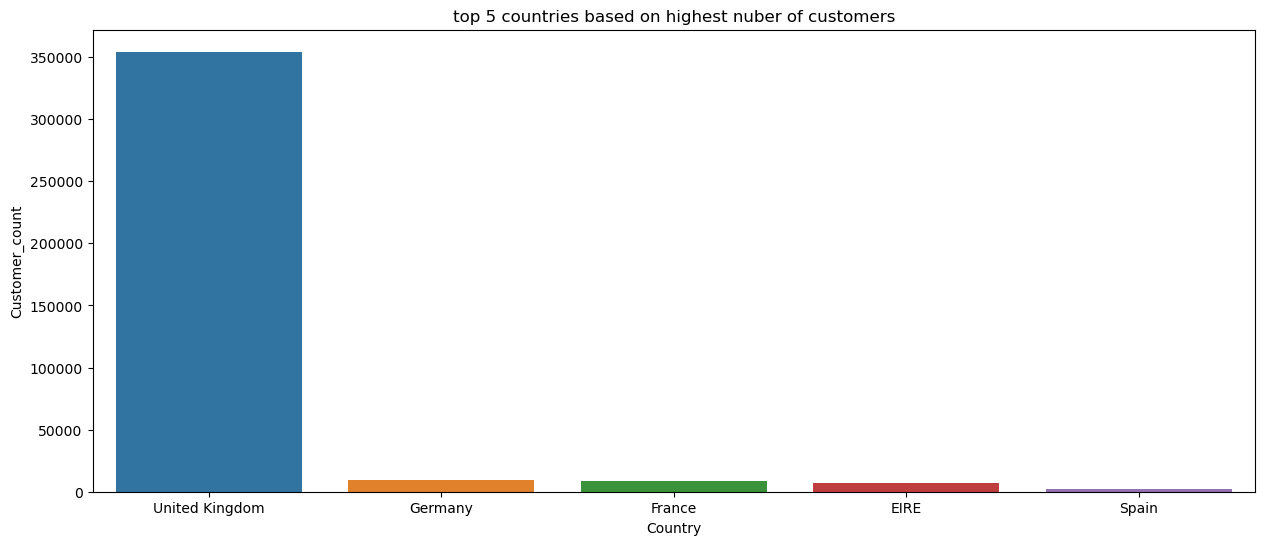

In [37]:
#top 5 countries where more sales happen
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'],y=top_5_countries['Customer_count'].head(5))
plt.title('top 5 countries based on highest nuber of customers')

In [43]:
top_5_countries = retail_df['Country'].value_counts().reset_index().rename(columns = {'index':'Country','Country':'Customer_count'}).tail(5)
top_5_countries

Country  Customer_count
32       Lithuania              35
33          Brazil              32
34  Czech Republic              25
35         Bahrain              17
36    Saudi Arabia               9

Text(0.5, 1.0, 'top 5 countries based on lowest number of customers')

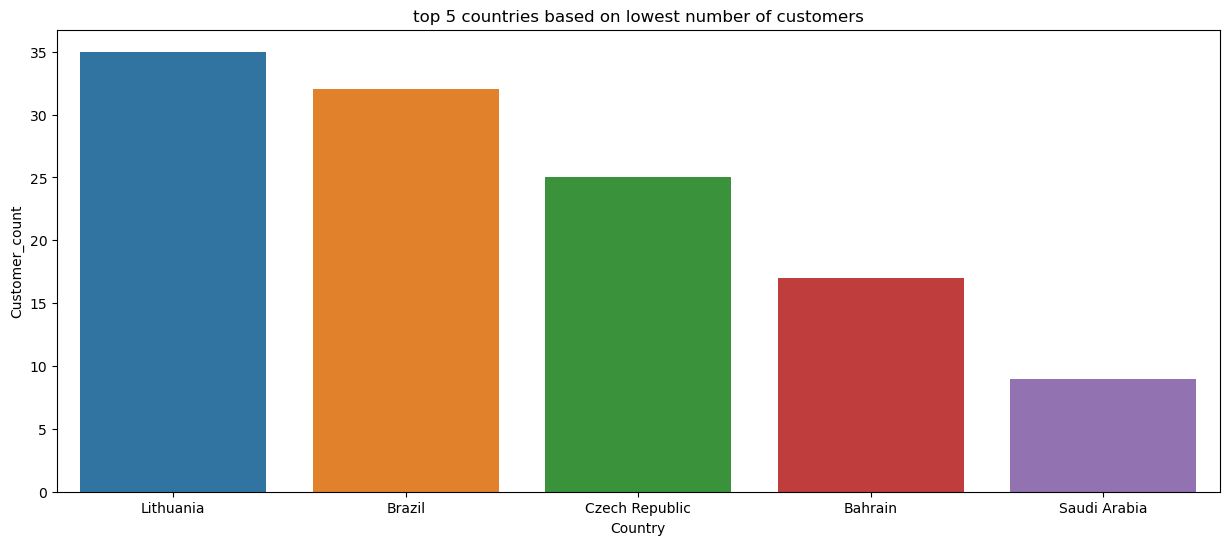

In [39]:
#top 5 countries where less sales happen
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'],y=top_5_countries['Customer_count'].tail(5))
plt.title('top 5 countries based on lowest number of customers')

In [44]:
#Sales count respective to month
sales_in_month = retail_df['Month'].value_counts().reset_index().rename(columns = {'index':'Month','Month':'Sales_count'})
sales_in_month

Month  Sales_count
0    November        64531
1     October        49554
2    December        43461
3   September        40028
4         May        28320
5        June        27185
6       March        27175
7      August        27007
8        July        26825
9       April        22642
10    January        21229
11   February        19927

Text(0.5, 1.0, 'Sales count in different month')

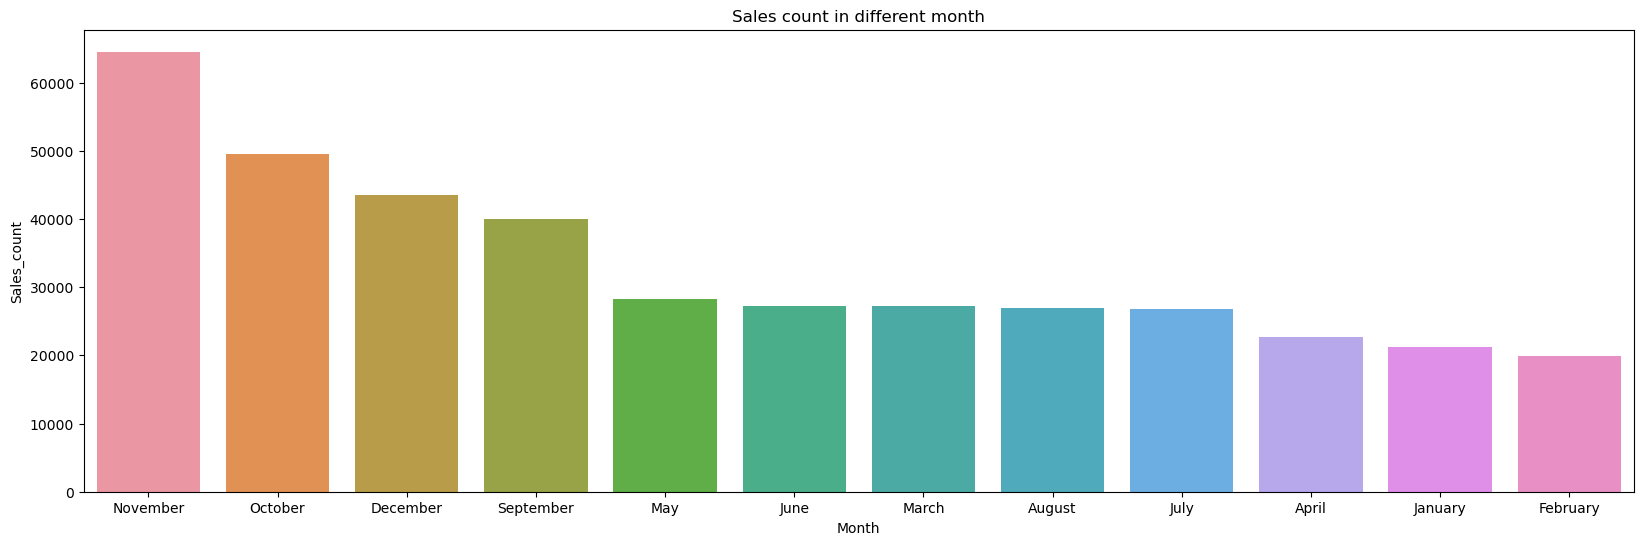

In [41]:
#Sales count in different month
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different month')

#Observations 
1. Most of the sell happen in November Month
2. February Month had least sales.

In [53]:
#Sales count on day basis
sales_on_day_basis = retail_df['Day'].value_counts().reset_index().rename(columns = {'index':'Day','Day':'Sales_count'})
sales_on_day_basis

Day  Sales_count
0   Thursday        80035
1  Wednesday        68885
2    Tuesday        66473
3     Monday        64893
4     Sunday        62773
5     Friday        54825

Text(0.5, 1.0, 'Sales count on day basis')

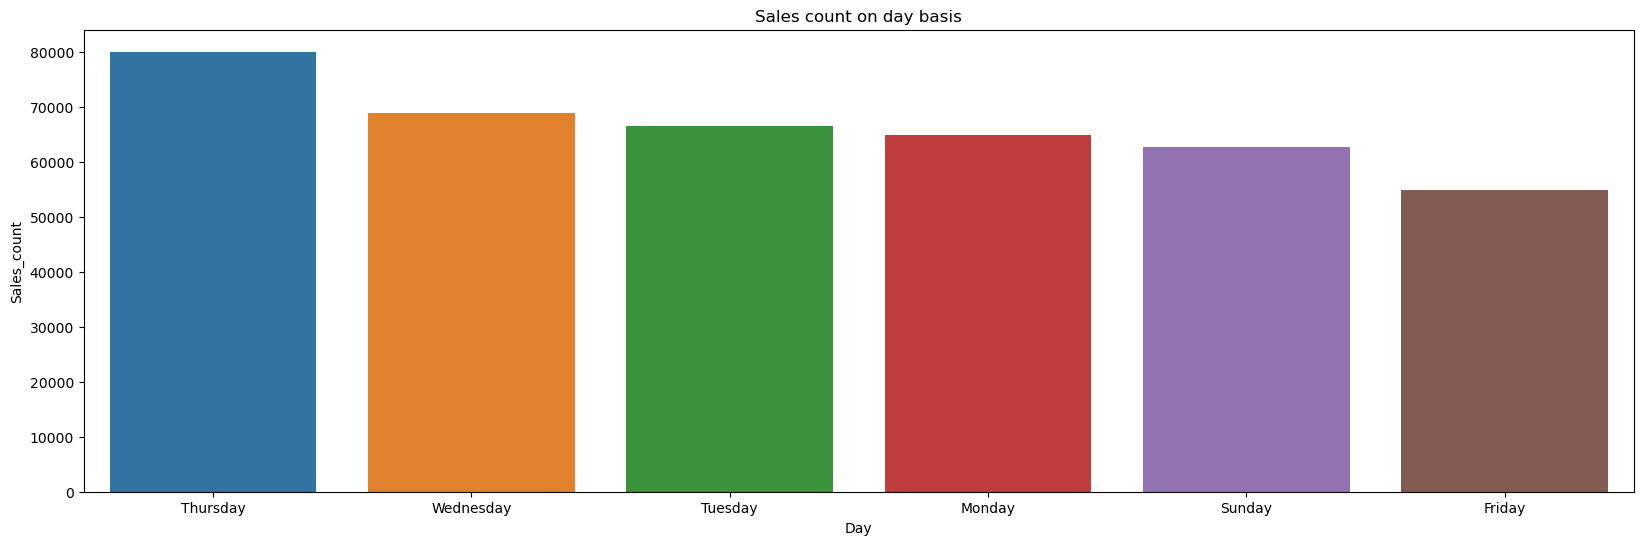

In [54]:
#Sales count on day basis
plt.figure(figsize=(20,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sales_count'])
plt.title('Sales count on day basis')

#Observations
1. Sales on Thursday are very high.
2. Sales on Friday are very less.

In [55]:
retail_df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6],
      dtype=int64)

In [56]:
def time(time):
    if(time==6 or time==7 or time==8 or time==10 or time==11):
        return 'Morning'
    elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
        return 'Afternoon'
    else:
        return 'Evening'

In [57]:
retail_df['Day_time_type']=retail_df['hour'].apply(time)

In [58]:
Sales_timing = retail_df['Day_time_type'].value_counts().reset_index().rename(columns = {'index':'Day_time_type','Day_time_type':'Sales_count'})
Sales_timing

Day_time_type  Sales_count
0     Afternoon       272738
1       Morning        96151
2       Evening        28995

Text(0.5, 1.0, 'Sales count on different timings')

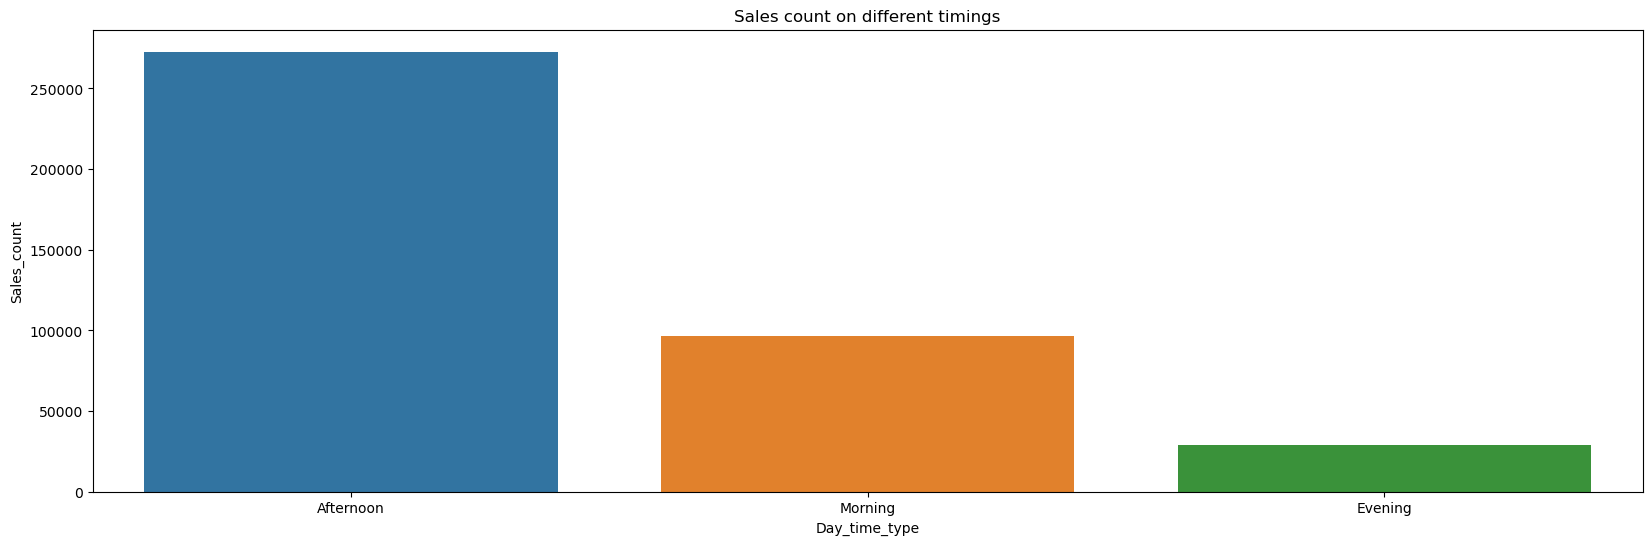

In [59]:
#Sales count on different timings
plt.figure(figsize=(20,6))
sns.barplot(x=Sales_timing['Day_time_type'],y=Sales_timing['Sales_count'])
plt.title('Sales count on different timings')

#Observations
1. Most of the sales happen in the afternoon.
2. Least sales happens in the evening.

In [60]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount', 'Day_time_type'],
      dtype='object')

In [61]:
avg_amount=retail_df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'avg_amount_per_customer'}).sort_values('avg_amount_per_customer')

In [52]:
avg_amount

CustomerID  avg_amount_per_customer
2315     15503.0                 2.101286
3995     17816.0                 2.150588
990      13684.0                 2.241000
697      13271.0                 2.264375
3590     17254.0                 2.432500
...          ...                      ...
2087     15195.0              3861.000000
2502     15749.0              4453.430000
2011     15098.0             13305.500000
3008     16446.0             56157.500000
0        12346.0             77183.600000

[4338 rows x 2 columns]

Text(0.5, 1.0, 'Average amount spent by each customer')

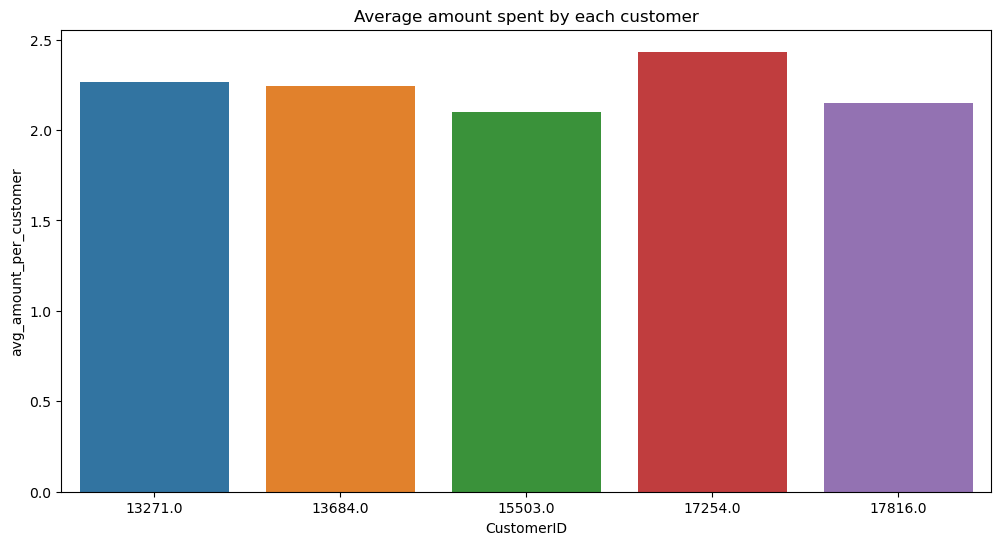

In [65]:
#average amount spent by customer
plt.figure(figsize=(12,6))
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['avg_amount_per_customer'].head(15))
plt.title('Average amount spent by each customer')

#Observations
1. Highest amount spent by customerID 17254

# Model Building

In [66]:
rfm_dataframe=retail_df.copy()

In [67]:
rfm_dataframe.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount Day_time_type  
0        1     8      26  December  Wednesday        15.30       Morning  
1        1     8      26  December  Wednesday        20.34       Morning  
2        1     8      26  December  Wednesday        22.00       Morning  
3        1     8      26  December  Wednesday        20.34       Morning  
4        1     8      26  December  Wednesday        20.34       Morning

In [68]:
import datetime as dt

In [69]:
Latest_Date=dt.datetime(2011,12,10)
rfm_dataframe=retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x :(Latest_Date - x.max()).days, 'InvoiceNo' : lambda x: len(x), 'TotalAmount' : lambda x : x.sum()})
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)
rfm_dataframe.rename(columns={'InvoiceDate' : 'Recency','InvoiceNo':'Frequency','TotalAmount':'Monetory'}, inplace=True)
rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetory
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [72]:
# Descriptive Stats = Recency
rfm_dataframe.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Distribution of Recency')

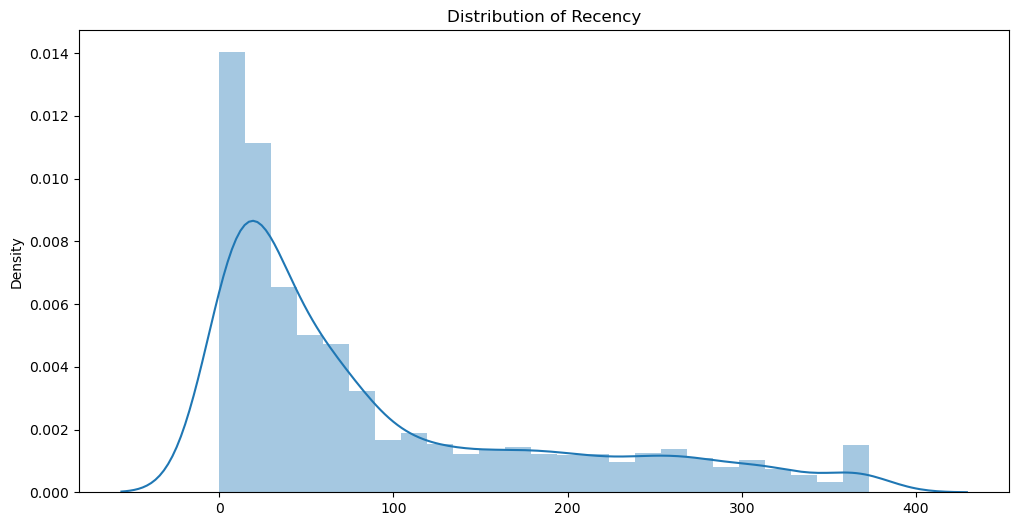

In [73]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Recency'])
plt.title('Distribution of Recency')

#Disrtibution of Recency is right skewed

In [74]:
#Descriptive Stats = Frequency
rfm_dataframe['Frequency'].describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

Text(0.5, 1.0, 'Distribution of frequency')

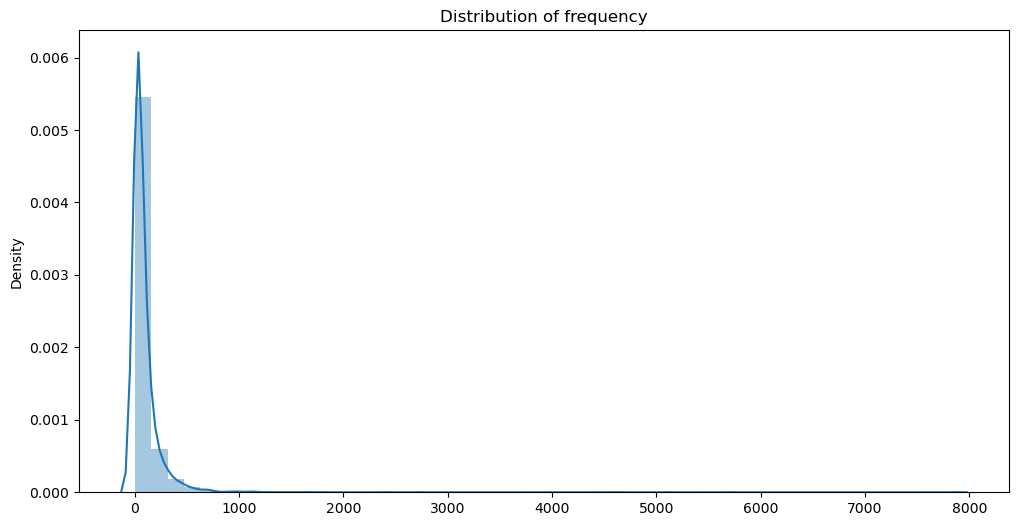

In [75]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Frequency'])
plt.title('Distribution of frequency')

#Distribution of Frequency is highy right skewed

In [80]:
#Descriptive Stats = Monetory
rfm_dataframe['Monetory'].describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetory, dtype: float64

Text(0.5, 1.0, 'Distribution of Monetory')

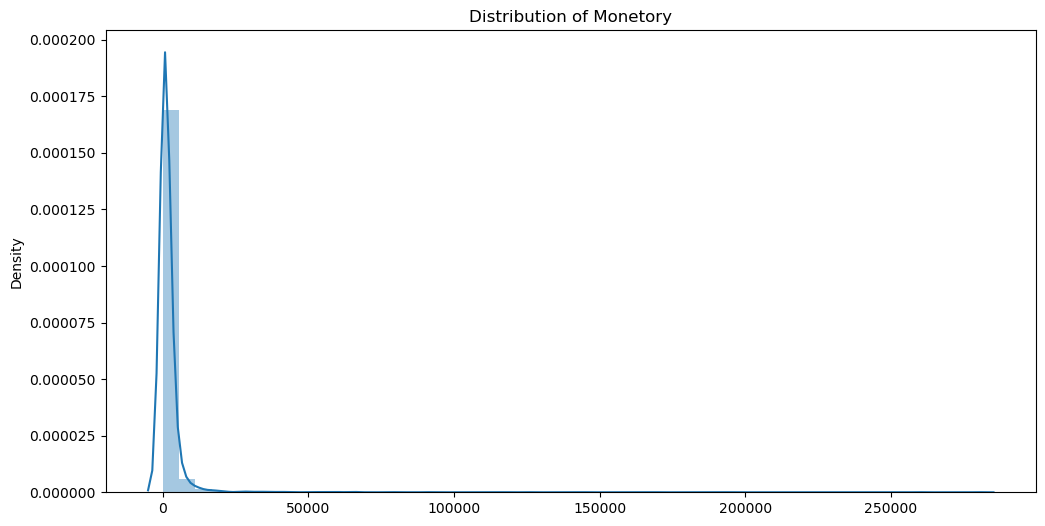

In [78]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Monetory'])
plt.title('Distribution of Monetory')

#Distribution of Monetory is highly right skewed

In [81]:
quantile = rfm_dataframe.quantile(q=[0.25,0.50,0.75])

In [82]:
quantile =quantile.to_dict()

In [83]:
quantile

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetory': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [84]:
#converting quantiles to a dictionary easier to use
def RScoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [85]:
rfm_dataframe["R"]=rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"]=rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"]=rfm_dataframe['Monetory'].apply(FnMScoring,args=('Recency',quantile,))
rfm_dataframe.head()

Recency  Frequency  Monetory  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  1

In [86]:
#add new column
rfm_dataframe['RFM_Group']=rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

In [87]:
rfm_dataframe['RFM_score']=rfm_dataframe[['R','F','M']].sum(axis=1)
rfm_dataframe.head()

Recency  Frequency  Monetory  R  F  M RFM_Group  RFM_score
CustomerID                                                            
12346.0         325          1  77183.60  4  4  1       441          9
12347.0           2        182   4310.00  1  1  1       111          3
12348.0          75         31   1797.24  3  3  1       331          7
12349.0          18         73   1757.55  2  2  1       221          5
12350.0         310         17    334.40  4  4  1       441          9

In [88]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int32  
 1   Frequency  4338 non-null   int64  
 2   Monetory   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFM_Group  4338 non-null   object 
 7   RFM_score  4338 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 288.1+ KB


In [89]:
rfm_dataframe['RFM_score'].unique()

array([ 9,  3,  7,  5, 10,  4,  8,  6, 11, 12], dtype=int64)

In [90]:
#assign loyalty level to each customer
Loyalty_Level = ['Platinum','Gold','Silver','Bronz']
Score_cut = pd.qcut(rfm_dataframe['RFM_score'],q=4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level']=Score_cut.values
rfm_dataframe.reset_index().head()


CustomerID  Recency  Frequency  Monetory  R  F  M RFM_Group  RFM_score  \
0     12346.0      325          1  77183.60  4  4  1       441          9   
1     12347.0        2        182   4310.00  1  1  1       111          3   
2     12348.0       75         31   1797.24  3  3  1       331          7   
3     12349.0       18         73   1757.55  2  2  1       221          5   
4     12350.0      310         17    334.40  4  4  1       441          9   

  RFM_Loyalty_Level  
0             Bronz  
1          Platinum  
2            Silver  
3              Gold  
4             Bronz

In [91]:
rfm_dataframe['RFM_score'].unique()

array([ 9,  3,  7,  5, 10,  4,  8,  6, 11, 12], dtype=int64)

In [92]:
#validate the data for RFM group =111
rfm_dataframe[rfm_dataframe['RFM_Group'] == '111'].sort_values("Monetory",ascending=False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetory  R  F  M RFM_Group  RFM_score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     14156.0        9       1400  117379.63  1  1  1       111          3   
5     17511.0        2        963   91062.38  1  1  1       111          3   
6     16684.0        4        277   66653.56  1  1  1       111          3   
7     14096.0        4       5111   65164.79  1  1  1       111          3   
8     13694.0        3        568   65039.62  1  1  1       111          3   
9     15311.0        0       2379   60767.90  1  1  1       111          3   

  RFM_Loyalty_Level  
0          Platinum  
1          Platinum  
2          Platinum  
3          Platinum  
4          Platinum  
5          Platinum  
6          Platinum  
7          Platinum  
8          Platinum  
9          Platinum

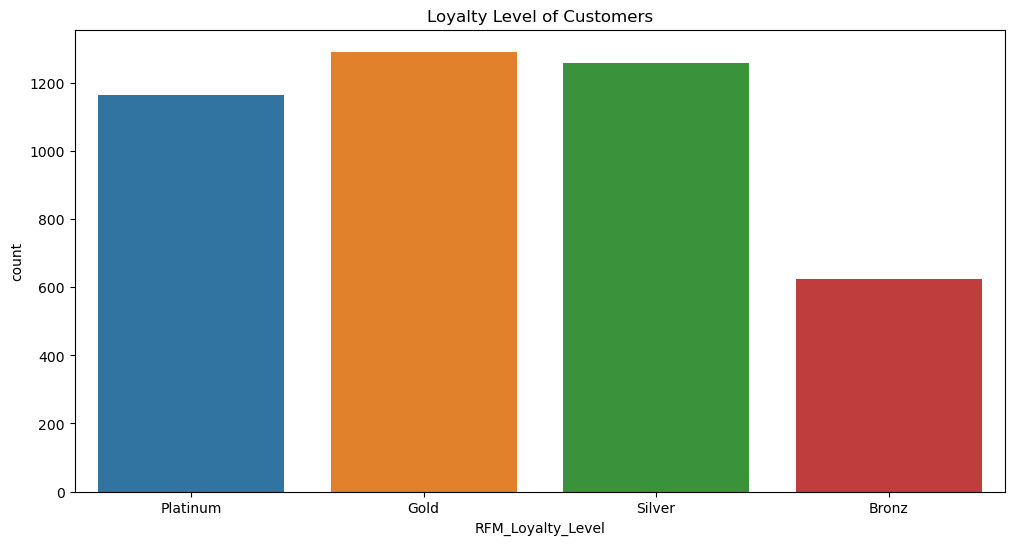

In [93]:
# plot the loyalty level
plt.figure(figsize=(12,6))
sns.countplot(data=rfm_dataframe, x='RFM_Loyalty_Level',)
plt.title('Loyalty Level of Customers')
plt.show()

In [94]:
#Following table contains our target variables
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level']=='Platinum'].sort_values("Monetory",ascending=False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetory  R  F  M RFM_Group  RFM_score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     12415.0       24        714  124914.53  2  1  1       211          4   
5     14156.0        9       1400  117379.63  1  1  1       111          3   
6     17511.0        2        963   91062.38  1  1  1       111          3   
7     16029.0       38        242   81024.84  2  1  1       211          4   
8     16684.0        4        277   66653.56  1  1  1       111          3   
9     14096.0        4       5111   65164.79  1  1  1       111          3   

  RFM_Loyalty_Level  
0          Platinum  
1          Platinum  
2          Platinum  
3          Platinum  
4          Platinum  
5          Platinum  
6          Platinum  
7          Platinum  
8          Platinum  
9          Platinum

In [95]:
segementation_based_on_RFM=rfm_dataframe[['Recency','Frequency','Monetory','RFM_Loyalty_Level']]

In [96]:
segementation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
      'Recency':['mean','min','max'],
      'Frequency':['mean','min','max'],
      'Monetory' :['mean','min','max','count']})

Recency            Frequency               Monetory  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinum            13.866094   0   50  234.989700  42  7847  5207.565322   
Gold                50.965944   0  372   66.017802   1   543  1387.897850   
Silver             135.589825   3  373   26.514308   1   100   586.984906   
Bronz              235.601926  18  373    8.781701   1    35   502.412953   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinum           161.03  280206.02  1165  
Gold               114.34  168472.50  1292  
Silver              35.40    9864.26  1258  
Bronz                3.75   77183.60   623

In [97]:
#handle negative and zero values so as to handle infinite numbers during the log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
rfm_dataframe['Recency']=[handle_neg_n_zero(x) for x in rfm_dataframe.Recency]
rfm_dataframe['Monetory']=[handle_neg_n_zero(x) for x in rfm_dataframe.Monetory]

In [99]:
#perform log transformation to bring data normal or near to normal distrbution
log_rfm_df=rfm_dataframe[['Recency','Frequency','Monetory']].apply(np.log, axis=1).round(3)

## Let's visualize the Distribution of Recency, Frequency and Monetory

Text(0.5, 1.0, 'Distribution of Recency')

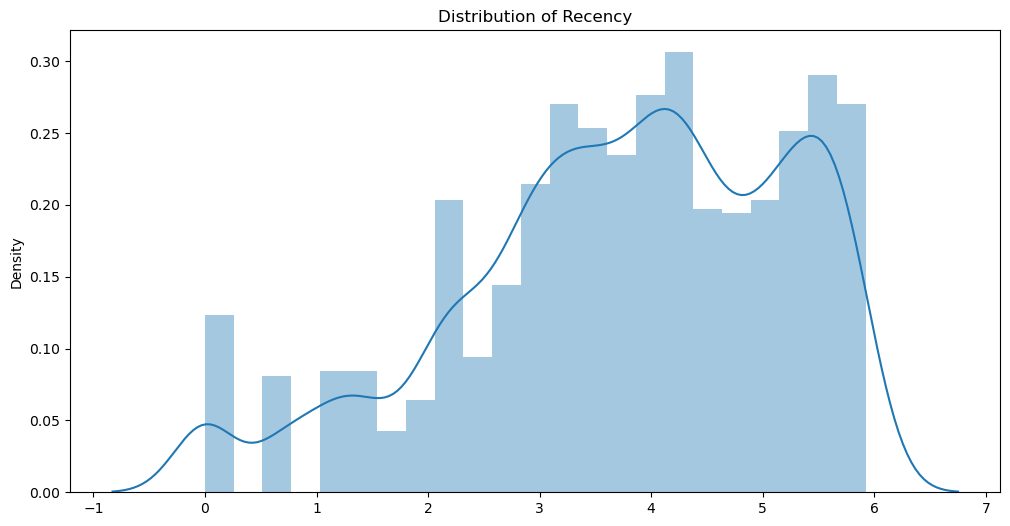

In [100]:
plt.figure(figsize=(12,6))
sns.distplot(x=log_rfm_df['Recency'])
plt.title('Distribution of Recency')

Text(0.5, 1.0, 'Distribution of Frequency')

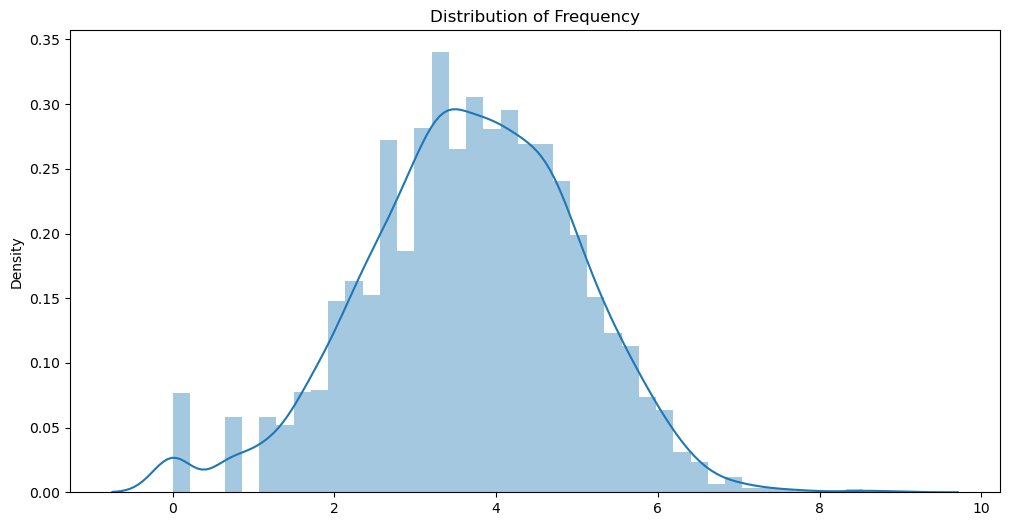

In [101]:
plt.figure(figsize=(12,6))
sns.distplot(x=log_rfm_df['Frequency'])
plt.title('Distribution of Frequency')

Text(0.5, 1.0, 'Distribution of Monetory')

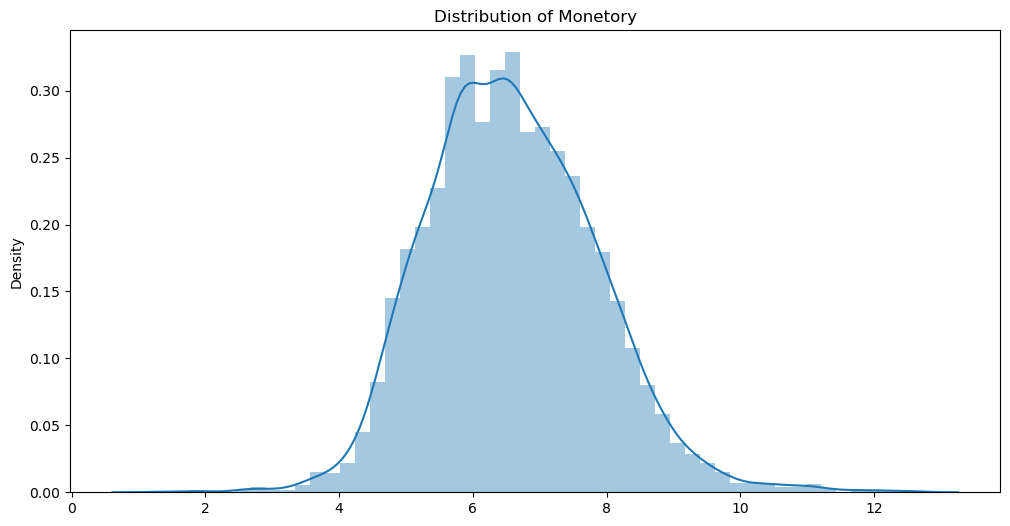

In [102]:
plt.figure(figsize=(12,6))
sns.distplot(x=log_rfm_df['Monetory'])
plt.title('Distribution of Monetory')

In [103]:
rfm_dataframe['Recency_log']=rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log']=rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetory_log']=rfm_dataframe['Monetory'].apply(math.log)

In [104]:
rfm_dataframe

Recency  Frequency  Monetory  R  F  M RFM_Group  RFM_score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  1       441          9   
...             ...        ...       ... .. .. ..       ...        ...   
18280.0         277         10    180.60  4  4  1       441          9   
18281.0         180          7     80.82  4  4  2       442         10   
18282.0           7         12    178.05  1  4  1       141          6   
18283.0           3        756   2094.88  1  1  1       111          3   
18287.0          42         70   1837.28  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetory_log  
CustomerID                                                              
12346.0                Bronz     5.783825       0.000000     11.253942  
12347.0             Platinum     0.693147       5.204007      8.368693  
12348.0               Silver     4.317488       3.433987      7.494007  
12349.0                 Gold     2.890372       4.290459      7.471676  
12350.0                Bronz     5.736572       2.833213      5.812338  
...                      ...          ...            ...           ...  
18280.0                Bronz     5.624018       2.302585      5.196285  
18281.0                Bronz     5.192957       1.945910      4.392224  
18282.0                 Gold     1.945910       2.484907      5.182064  
18283.0             Platinum     1.098612       6.628041      7.647252  
18287.0                 Gold     3.737670       4.248495      7.516041  

[4338 rows x 12 columns]

# Kmeans Clustering

In [106]:
#Import libraries
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [107]:
!pip install yellowbrick

Before Implementing the Kmeans Clustering algorithm we need to decide the number of clusters to put inside
algorithm as Input. So we will be finding the minimum number of clusters required by using Elbow method.


# # 1.Applying Elbow Method on Recency and Monetory.

In [109]:
Recency_and_Monetory_feat=['Recency_log','Monetory_log']

In [110]:
x=rfm_dataframe[Recency_and_Monetory_feat].values

In [111]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

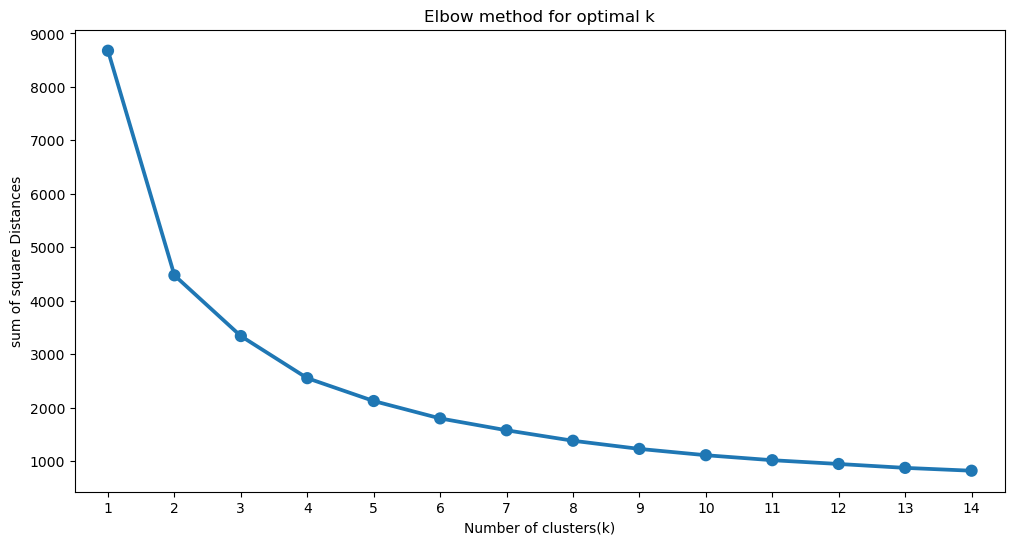

In [112]:
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter = 1000)
    km = km.fit(x)
    wcss[k] = km.inertia_
    
plt.figure(figsize=(12,6))    
sns.pointplot(x= list(wcss.keys()),y = list(wcss.values()))
plt.xlabel('Number of clusters(k)')
plt.ylabel('sum of square Distances')
plt.title('Elbow method for optimal k')
plt.show()

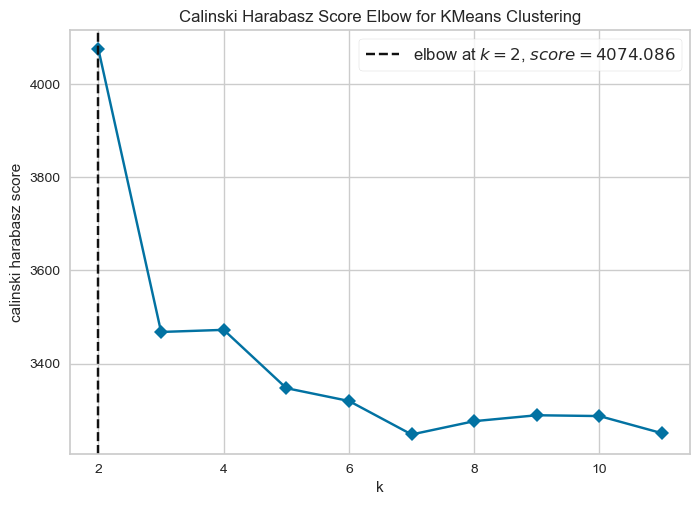

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [92]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(
   model, k=(2,12), metric='calinski_harabasz', timings=False
)
visualizer.fit(x)
visualizer.show()

Silhouette Score

In [125]:
Recency_and_Monetory_feat=['Recency_log','Monetory_log']
x=rfm_dataframe[Recency_and_Monetory_feat].values
scaler=StandardScaler()
X=scaler.fit_transform(x)
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer= KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers= clusterer.cluster_centers_
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is{}".format(n_clusters, score))


For n_clusters = 2, silhouette score is0.421461308316105
For n_clusters = 3, silhouette score is0.3433470120059089
For n_clusters = 4, silhouette score is0.3649058771514865
For n_clusters = 5, silhouette score is0.3395250404488943
For n_clusters = 6, silhouette score is0.3422201212043055
For n_clusters = 7, silhouette score is0.34787086356830993
For n_clusters = 8, silhouette score is0.33774535264866695
For n_clusters = 9, silhouette score is0.3459604789419575
For n_clusters = 10, silhouette score is0.3479066146663346
For n_clusters = 11, silhouette score is0.33753966718471434
For n_clusters = 12, silhouette score is0.3427273975494072
For n_clusters = 13, silhouette score is0.34235758342627326
For n_clusters = 14, silhouette score is0.3376357432302628
For n_clusters = 15, silhouette score is0.33730368894983076


Here we can see the for n_cluster = 2 silhouette score is good as compared to others.(If values is close to 1 means data points are 
clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.                                                                                     )

For n_clusters= 2 The average silhouette_score is : 0.421461308316105


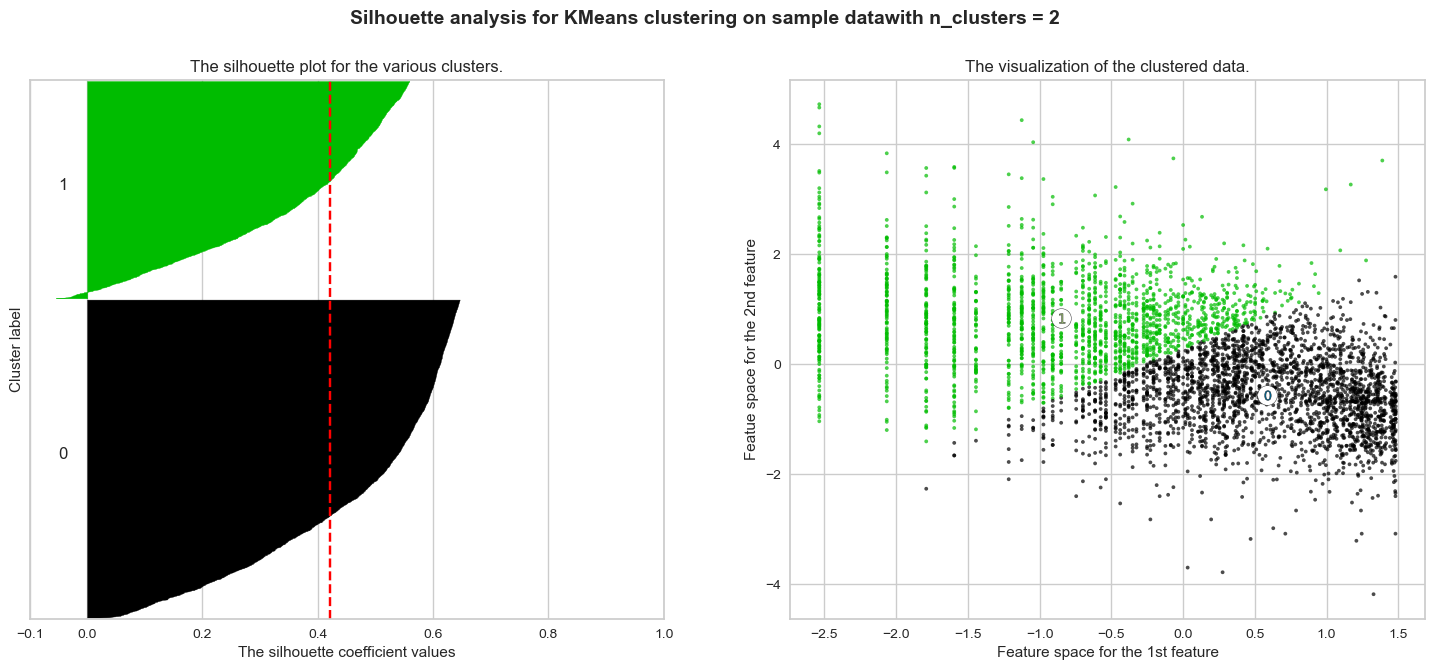

For n_clusters= 3 The average silhouette_score is : 0.3433470120059089


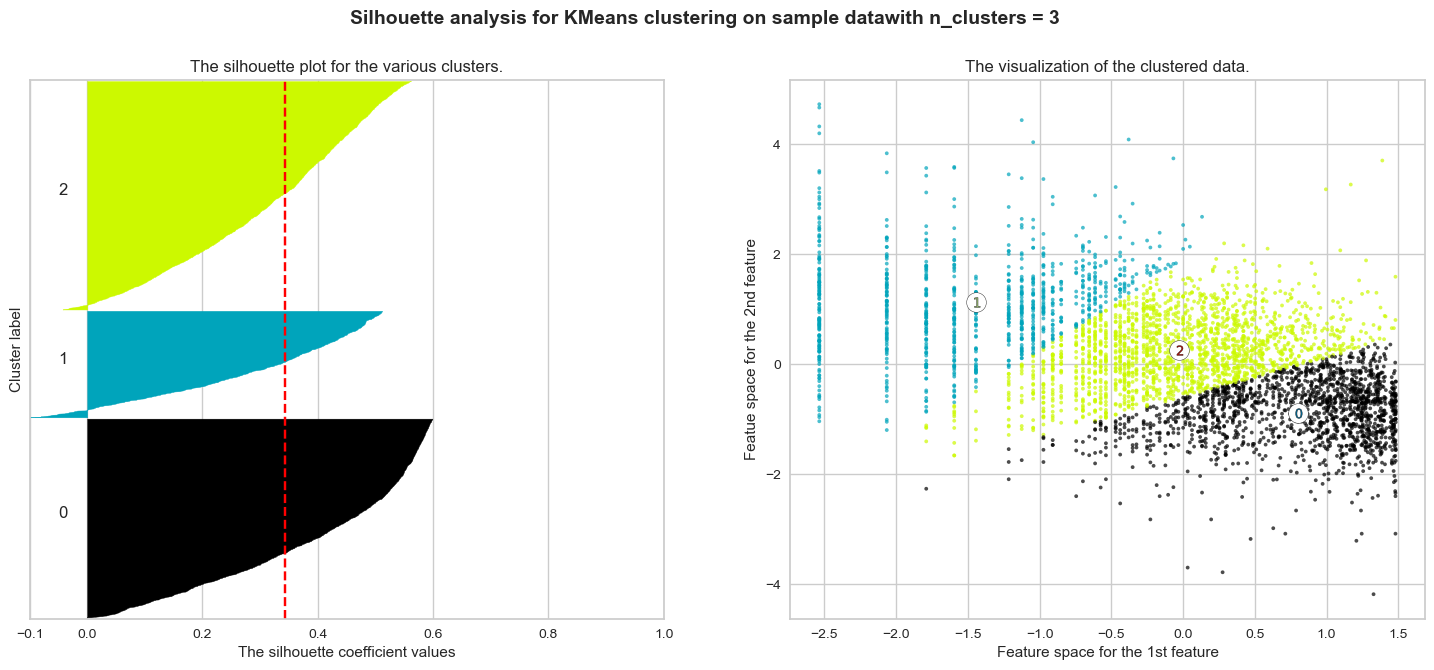

For n_clusters= 4 The average silhouette_score is : 0.3649058771514865


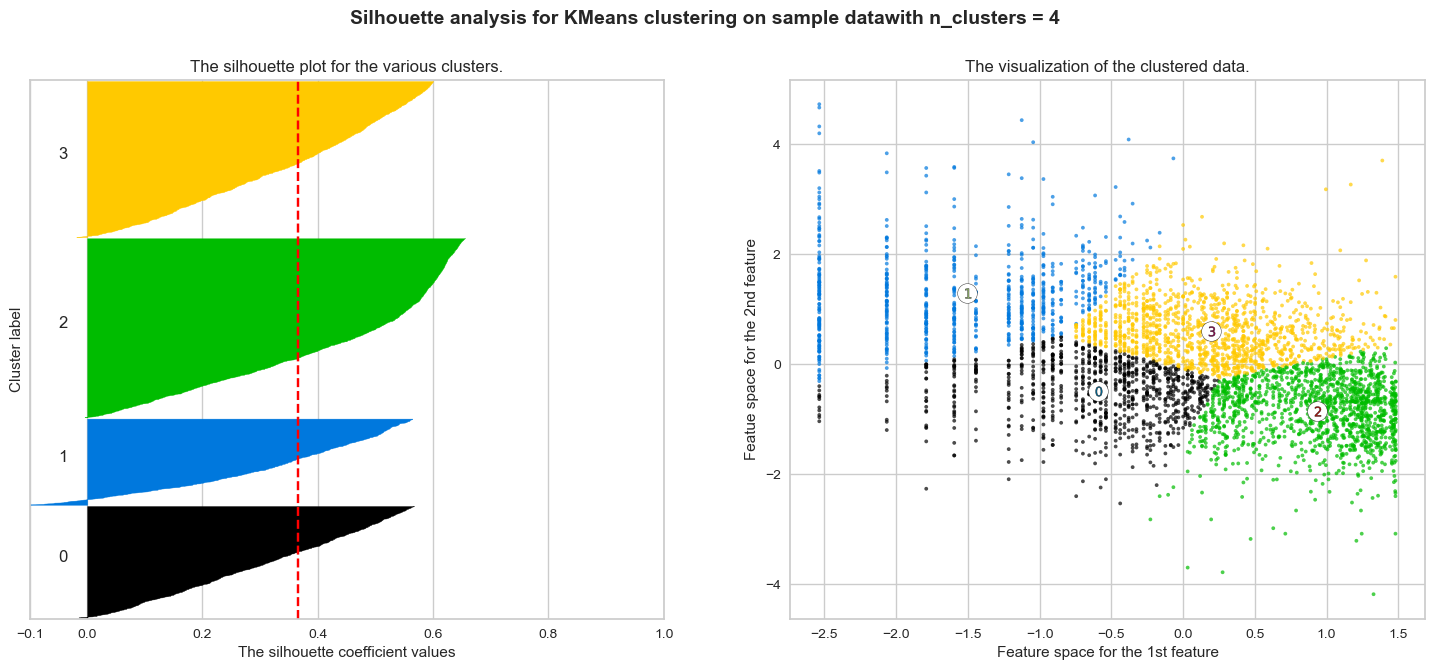

For n_clusters= 5 The average silhouette_score is : 0.3395250404488943


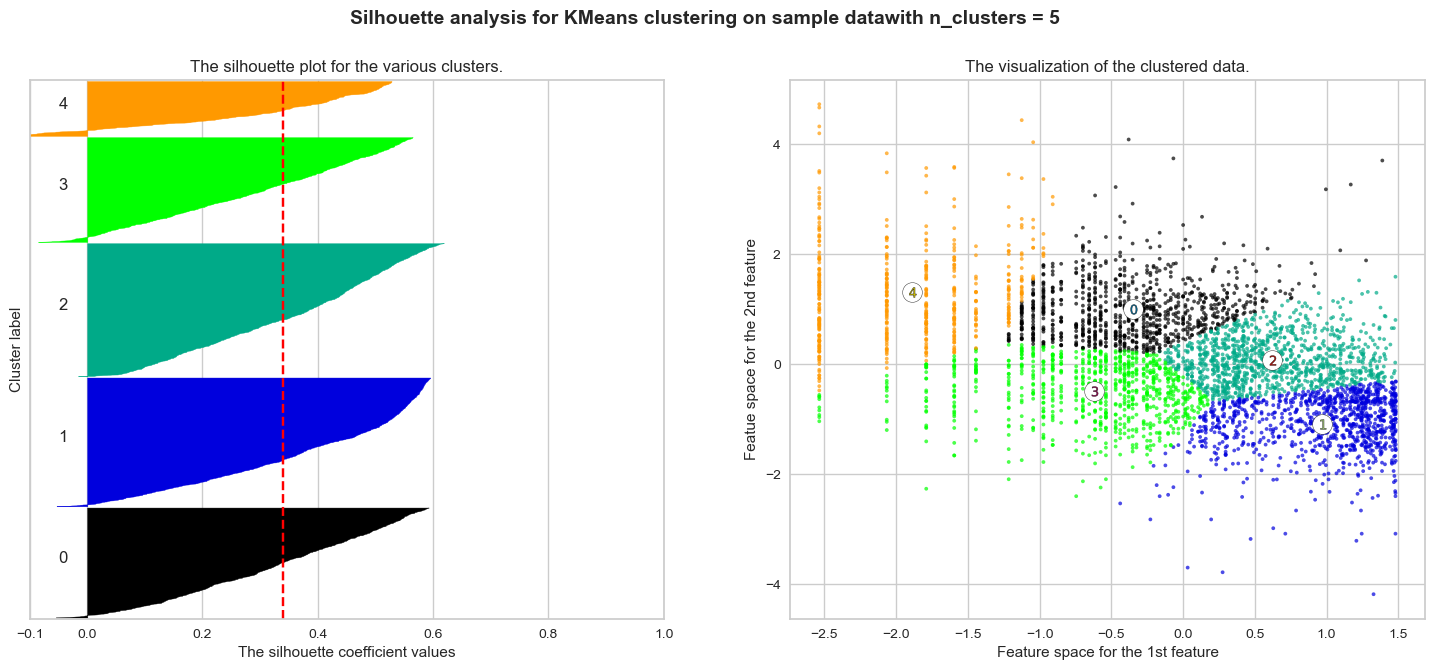

For n_clusters= 6 The average silhouette_score is : 0.3422201212043055


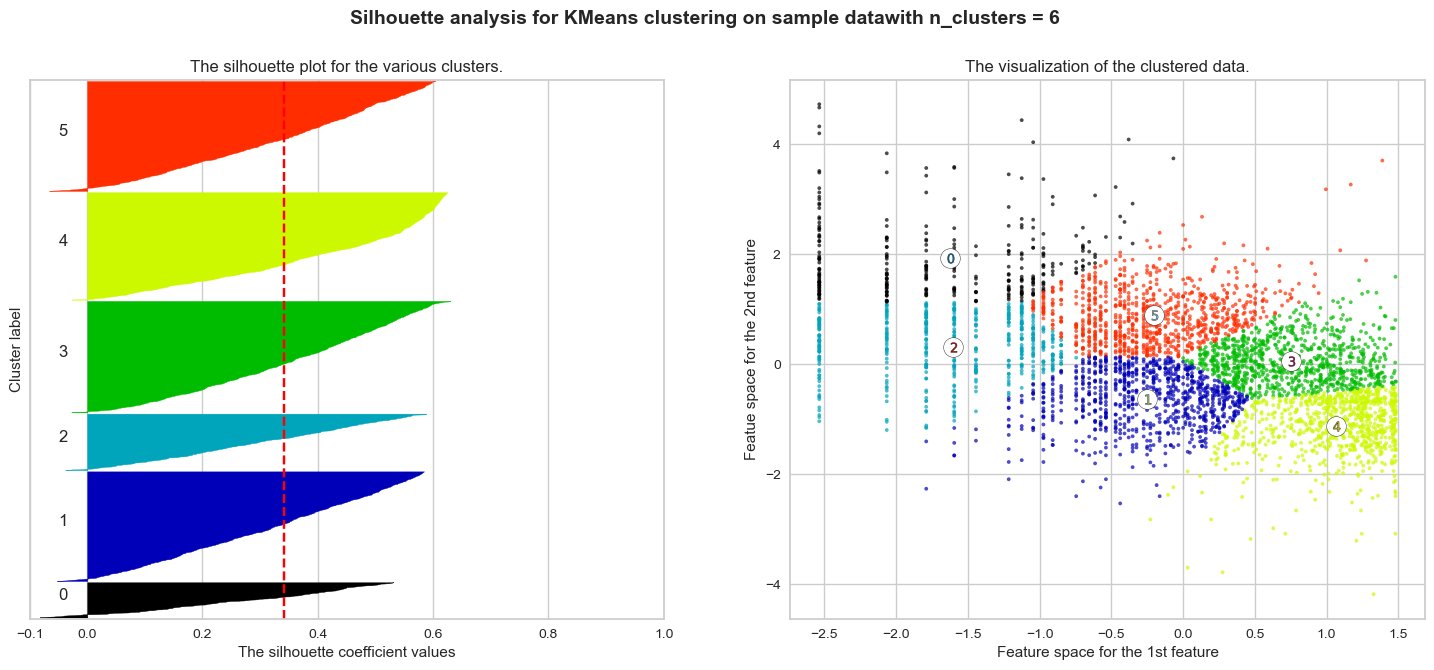

For n_clusters= 7 The average silhouette_score is : 0.34787086356830993


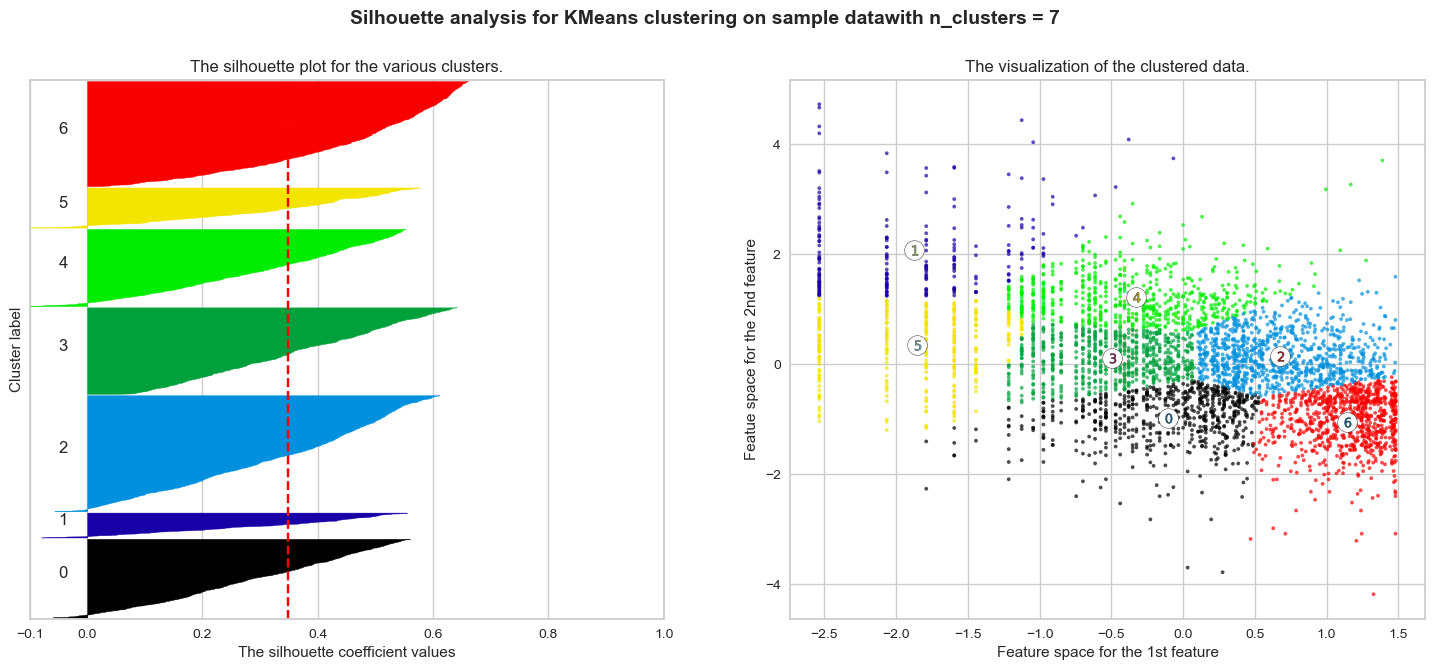

For n_clusters= 8 The average silhouette_score is : 0.33774535264866695


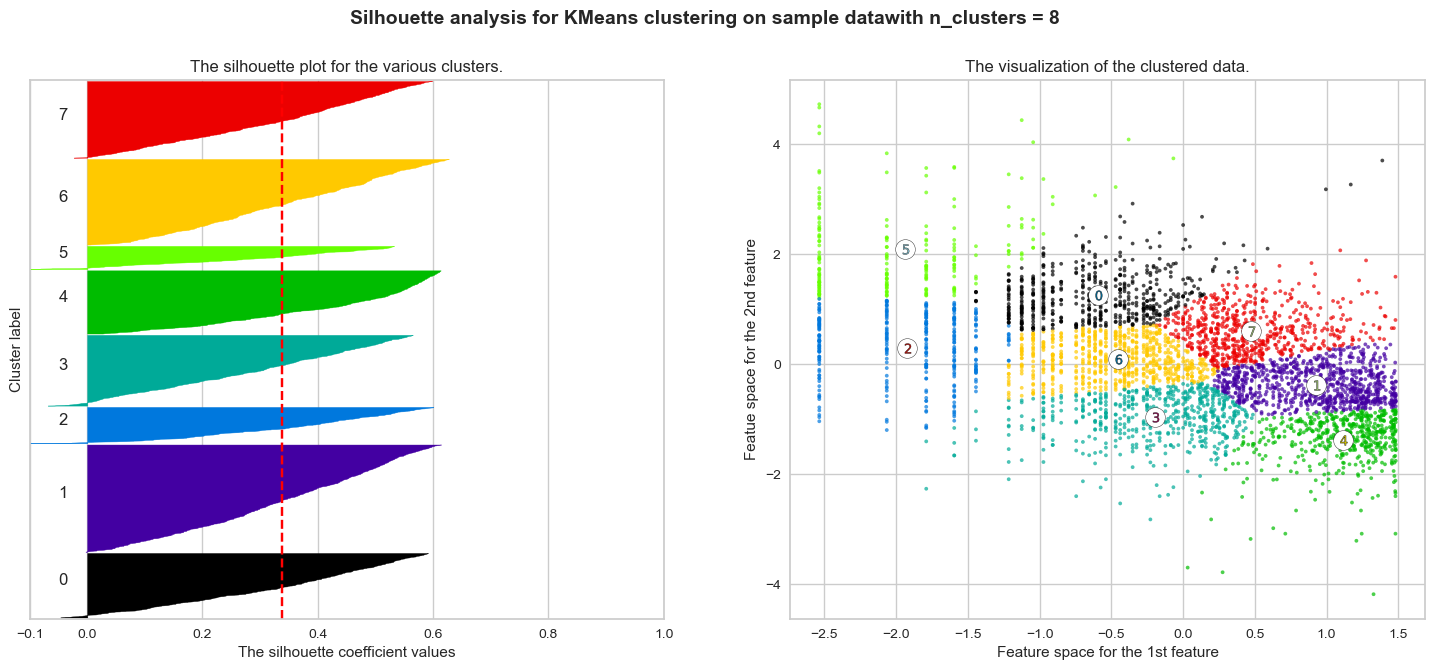

For n_clusters= 9 The average silhouette_score is : 0.3459604789419575


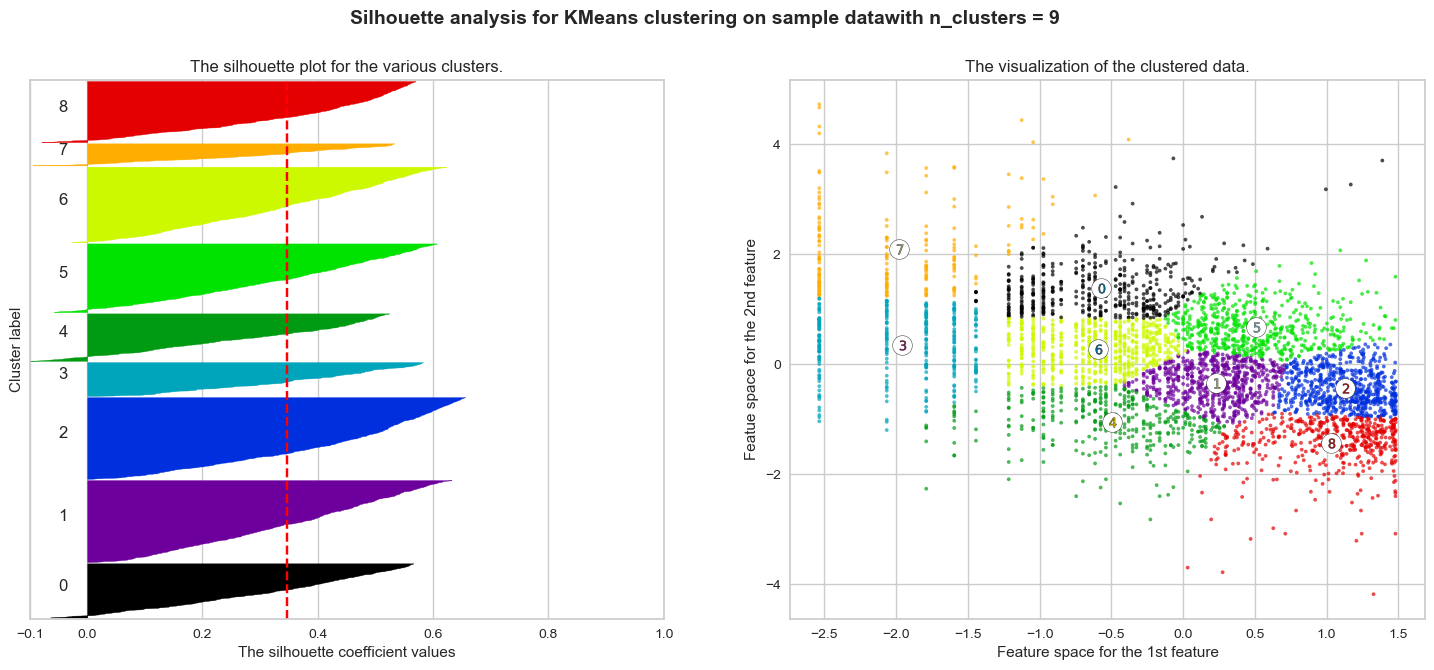

For n_clusters= 10 The average silhouette_score is : 0.3479066146663346


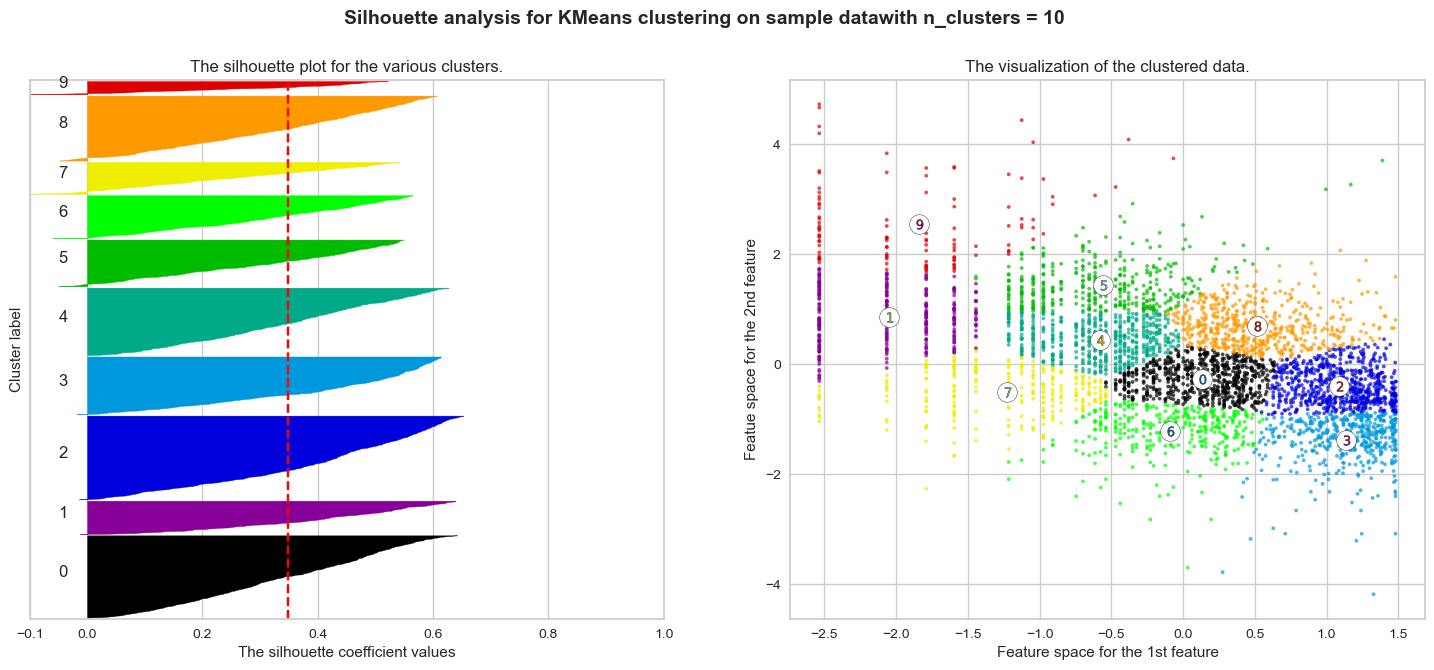

In [126]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    fig,(ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters=", n_clusters,
         "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
           sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i= ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.") 
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker ='o', 
               c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                   s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Featue space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data"
                 "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')
    
    plt.show()

In [116]:
#applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [117]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon']=kmeans_freq_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetory  R  F  M RFM_Group  RFM_score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  1       441          9   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  2       442         10   
12354.0         232         58   1079.40  4  2  1       421          7   
12355.0         214         13    459.40  4  4  1       441          9   
12356.0          22         59   2811.43  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetory_log  \
CustomerID                                                               
12346.0                Bronz     5.783825       0.000000     11.253942   
12347.0             Platinum     0.693147       5.204007      8.368693   
12348.0               Silver     4.317488       3.433987      7.494007   
12349.0                 Gold     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0                 Gold     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0               Silver     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0                 Gold     3.091042       4.077537      7.941449   

            Cluster_based_on_freq_mon  
CustomerID                             
12346.0                             1  
12347.0                             1  
12348.0                             1  
12349.0                             1  
12350.0                             0  
12352.0                             1  
12353.0                             0  
12354.0                             1  
12355.0                             0  
12356.0                             1

In [118]:
#Centers of the clusters(coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[-0.70609673, -0.71301221],
       [ 0.78953199,  0.79726463]])

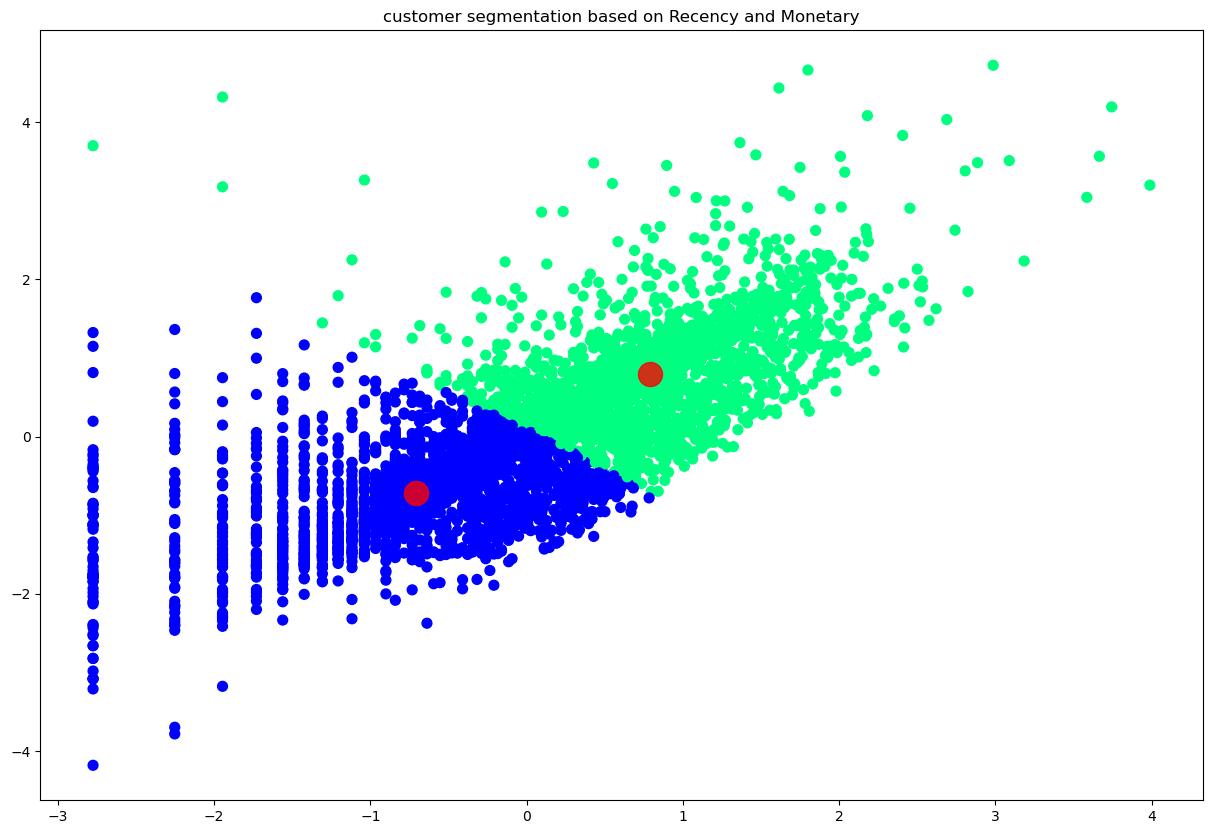

In [119]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0],X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

## DBSCAN Algorithm on Recency and Monetory

In [138]:
db=DBSCAN(eps=0.5, min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" %silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 47
Silhouette Coefficient: 0.426


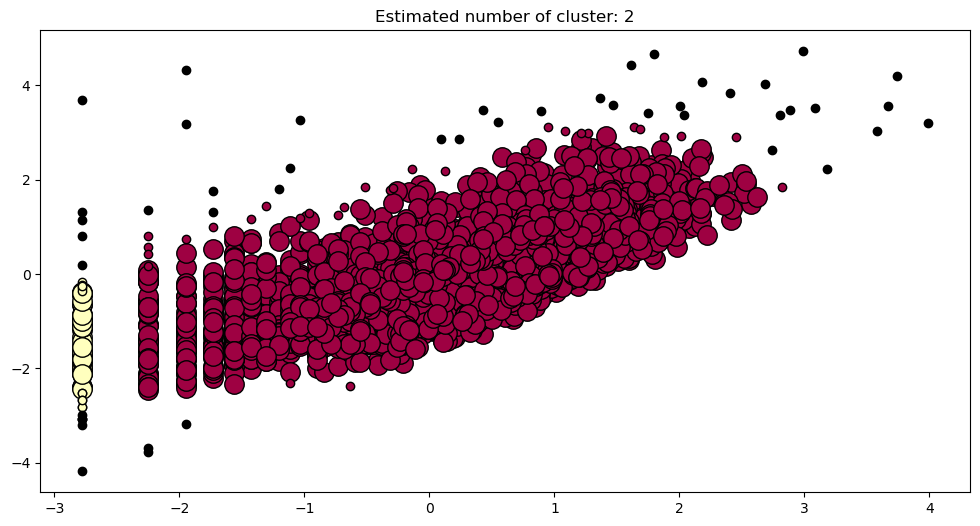

In [121]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = labels ==k
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    plt.title("Estimated number of cluster: %d" % n_clusters_)
    
plt.show()

## ---------Frequency and Monetory------------

## Kmeans Clustering

###1.Applying Elbow Method on Frequency and Monetory

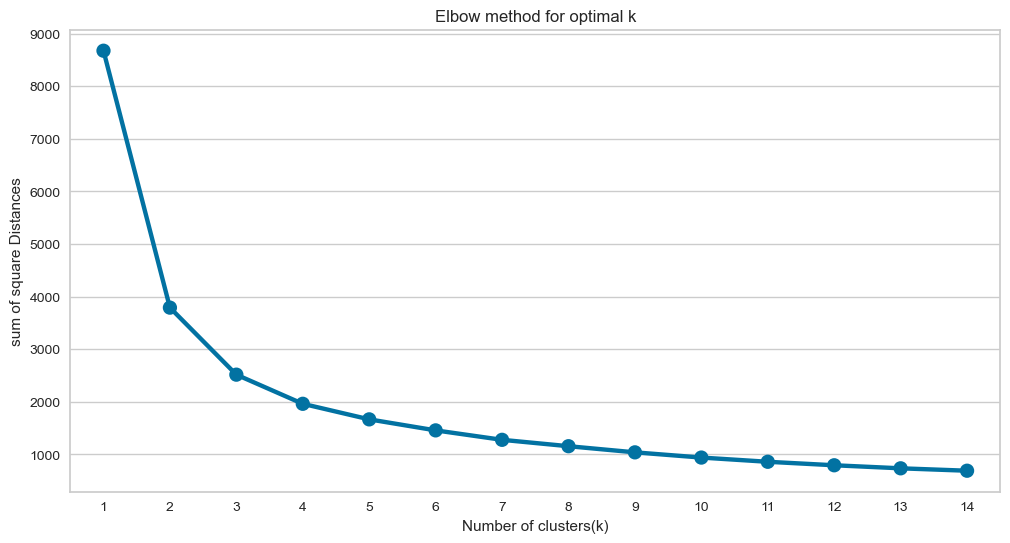

In [128]:
Frequency_and_Monetory_feat=['Frequency_log','Monetory_log']

x=rfm_dataframe[Frequency_and_Monetory_feat].values

scaler=StandardScaler()
x=scaler.fit_transform(x)

wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter = 1000)
    km = km.fit(x)
    wcss[k] = km.inertia_
    
plt.figure(figsize=(12,6))    
sns.pointplot(x= list(wcss.keys()),y = list(wcss.values()))
plt.xlabel('Number of clusters(k)')
plt.ylabel('sum of square Distances')
plt.title('Elbow method for optimal k')
plt.show()

Here we can see that Otimal value for cluster came out to be 2

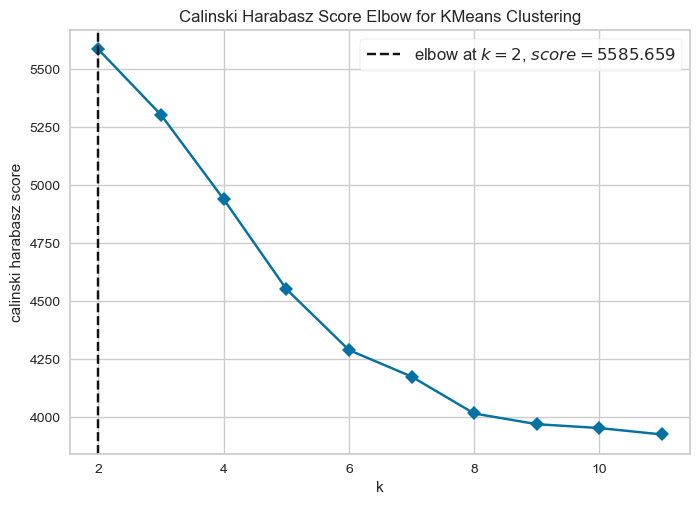

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [129]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(
   model, k=(2,12), metric='calinski_harabasz', timings=False
)
visualizer.fit(x)
visualizer.show()

Elbow Visualizer also giving cluster=2

In [130]:
Frequency_and_Monetory_feat=['Frequency_log','Monetory_log']
x=rfm_dataframe[Frequency_and_Monetory_feat].values
scaler=StandardScaler()
X=scaler.fit_transform(x)
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer= KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers= clusterer.cluster_centers_
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is{}".format(n_clusters, score))

For n_clusters = 2, silhouette score is0.478535709506603
For n_clusters = 3, silhouette score is0.40764120562174455
For n_clusters = 4, silhouette score is0.3715810384601166
For n_clusters = 5, silhouette score is0.3442965607959301
For n_clusters = 6, silhouette score is0.3586829219947334
For n_clusters = 7, silhouette score is0.34342098057749704
For n_clusters = 8, silhouette score is0.3500546906243836
For n_clusters = 9, silhouette score is0.34419928062567495
For n_clusters = 10, silhouette score is0.36238664926507114
For n_clusters = 11, silhouette score is0.3682455762844025
For n_clusters = 12, silhouette score is0.3534862139672636
For n_clusters = 13, silhouette score is0.36139542577471895
For n_clusters = 14, silhouette score is0.3486849890768239
For n_clusters = 15, silhouette score is0.3628225939841498


Here we can see the for n_cluster = 2 silhouette score is good as compared to others.(If values is close to 1 means data points are clustered very well to respective clusters and distance of 
that datapoint is very far from the other cluster. )

For n_clusters= 2 The average silhouette_score is : 0.478535709506603


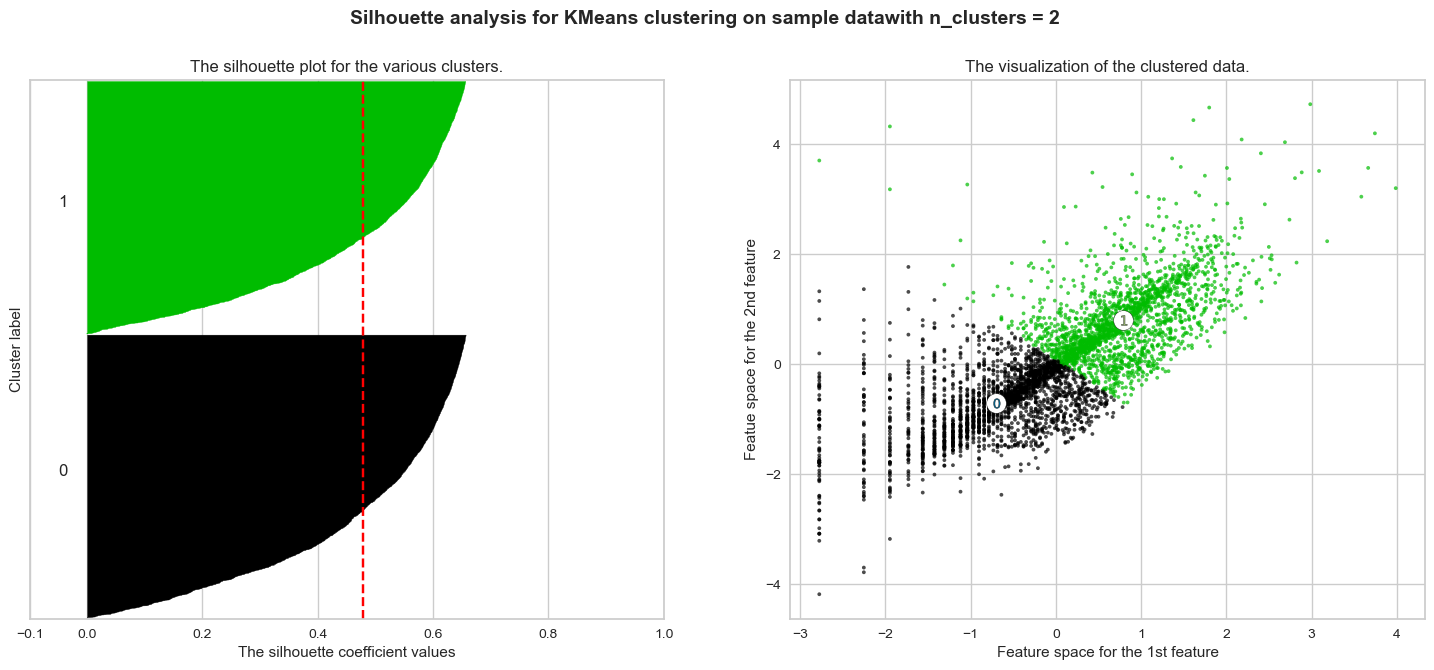

For n_clusters= 3 The average silhouette_score is : 0.40764120562174455


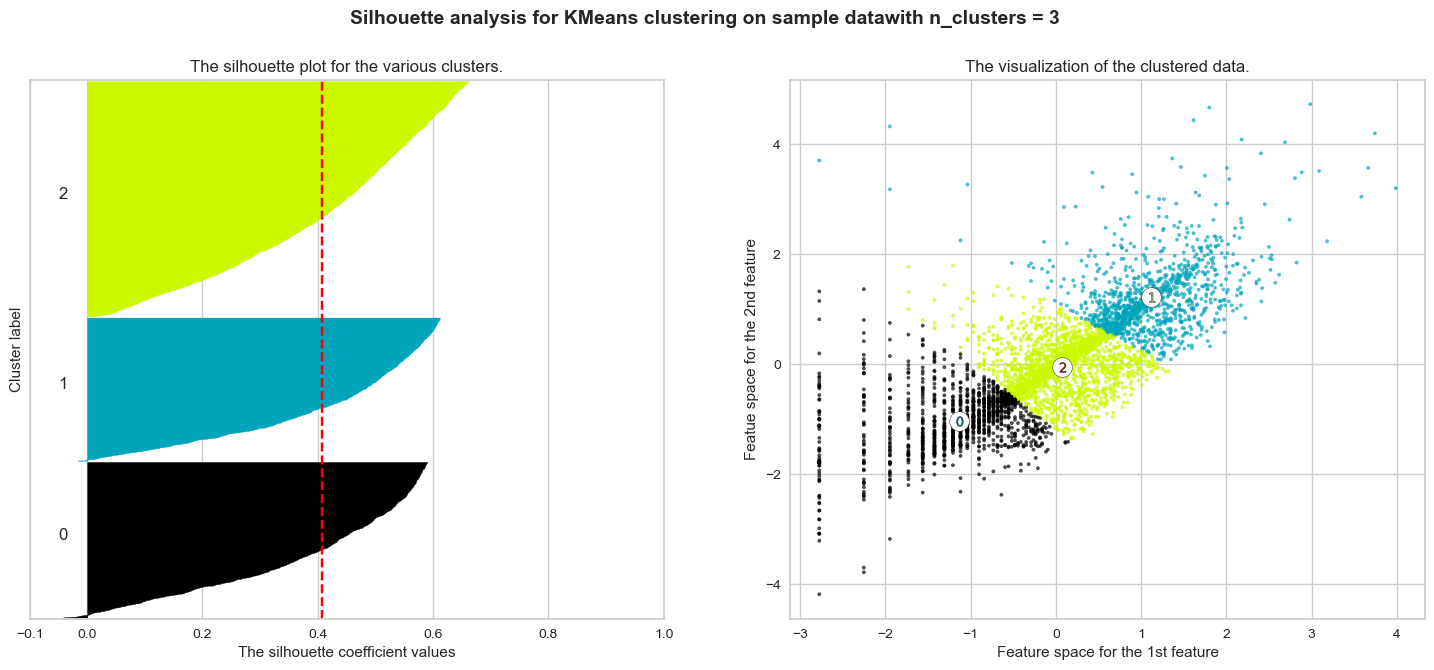

For n_clusters= 4 The average silhouette_score is : 0.3715810384601166


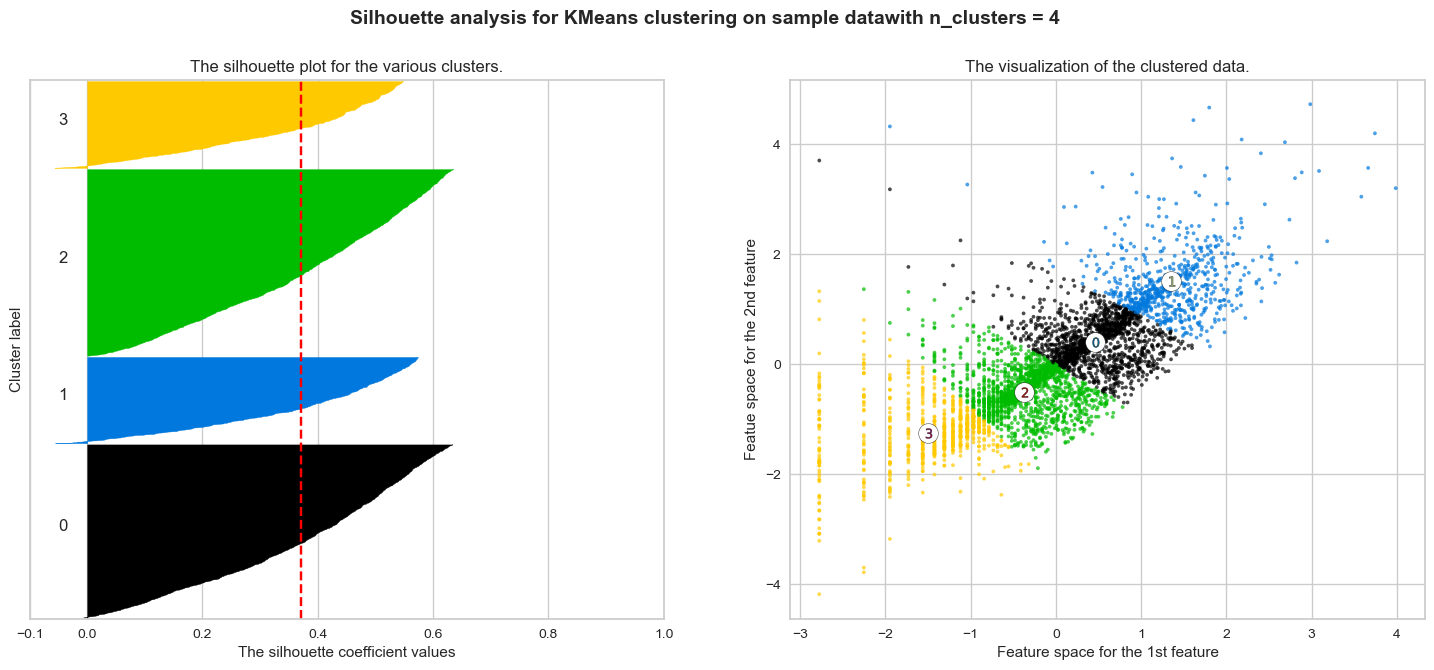

For n_clusters= 5 The average silhouette_score is : 0.3442965607959301


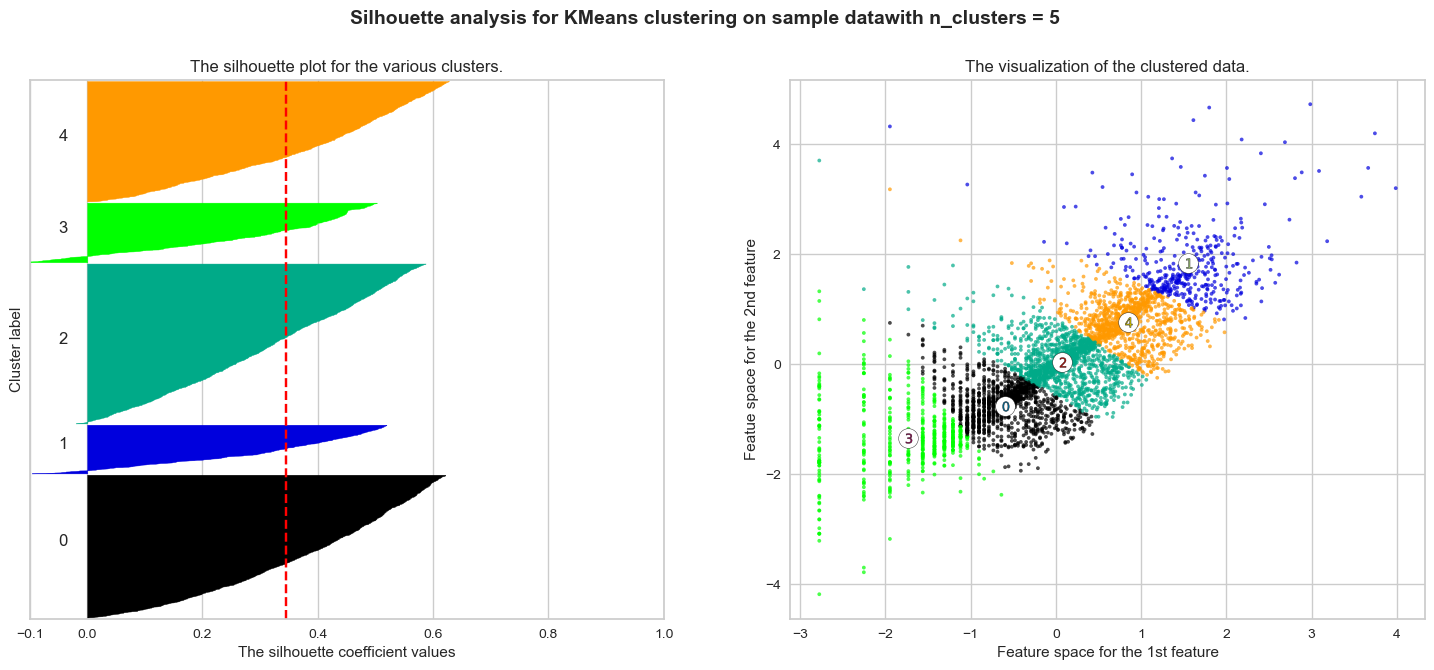

For n_clusters= 6 The average silhouette_score is : 0.3586829219947334


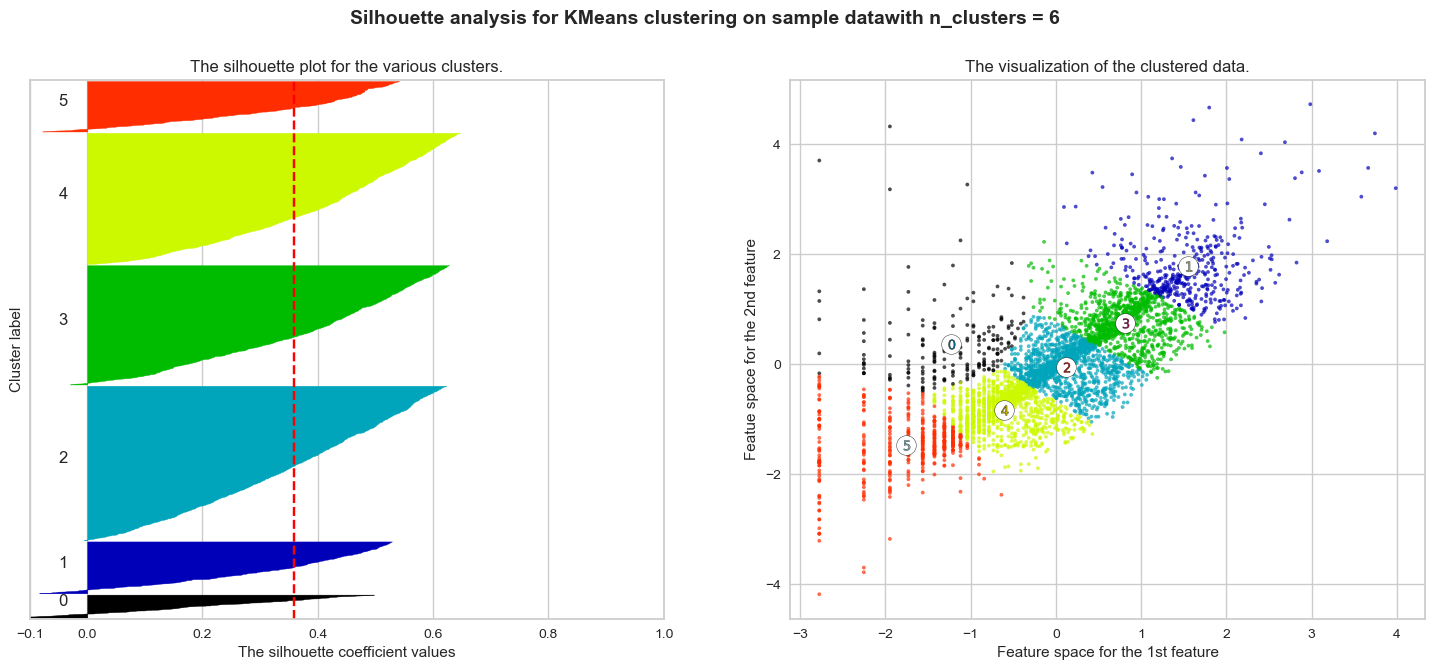

For n_clusters= 7 The average silhouette_score is : 0.34342098057749704


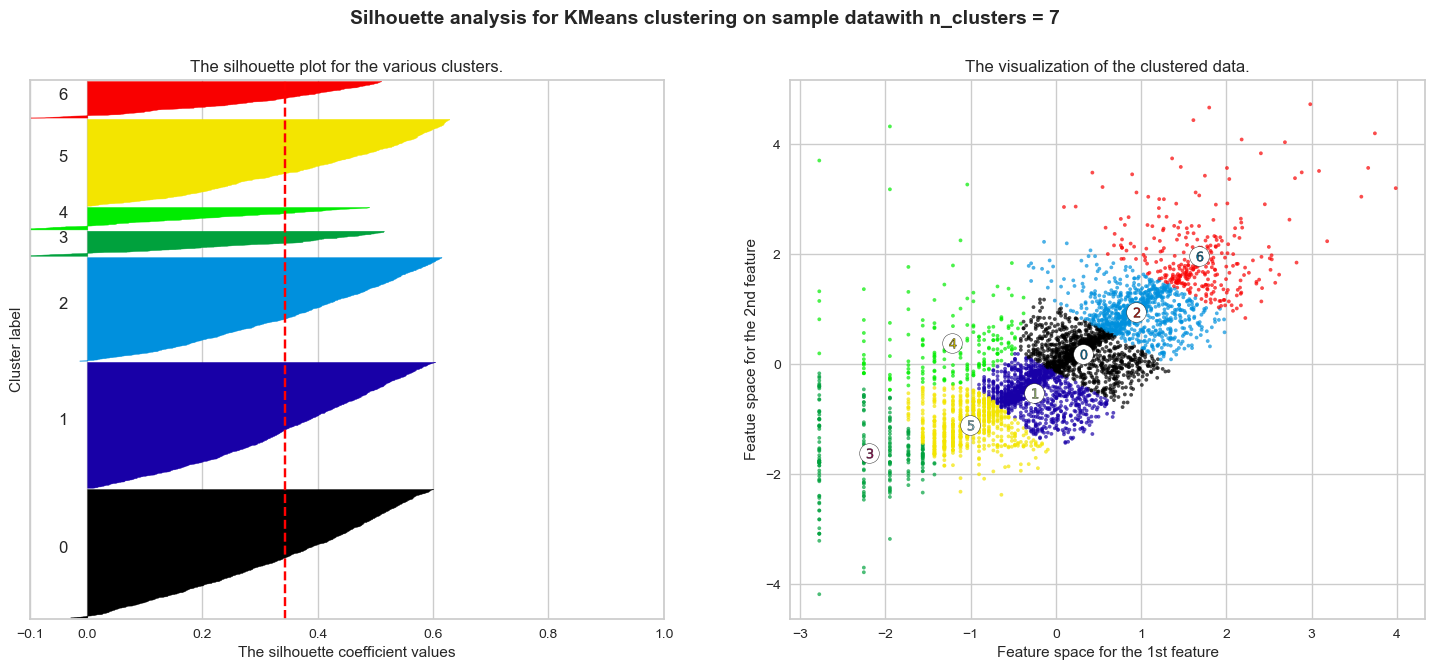

For n_clusters= 8 The average silhouette_score is : 0.3500546906243836


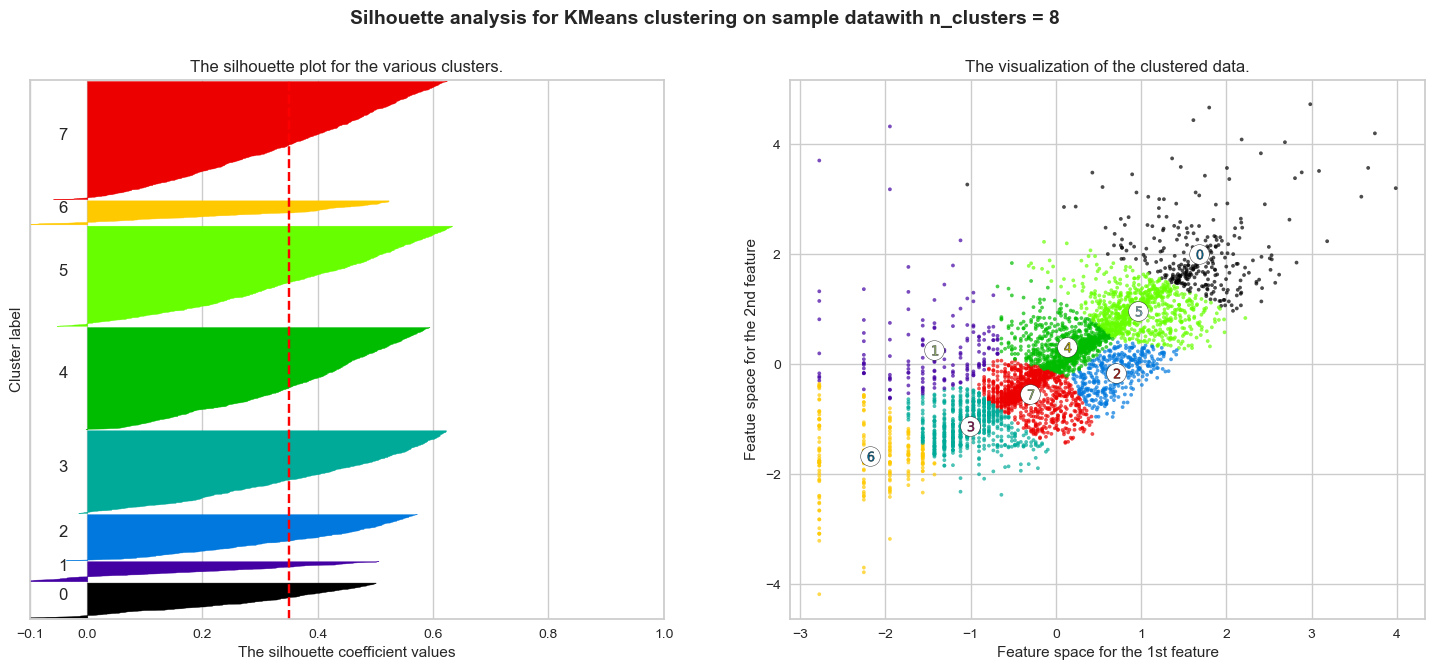

For n_clusters= 9 The average silhouette_score is : 0.34419928062567495


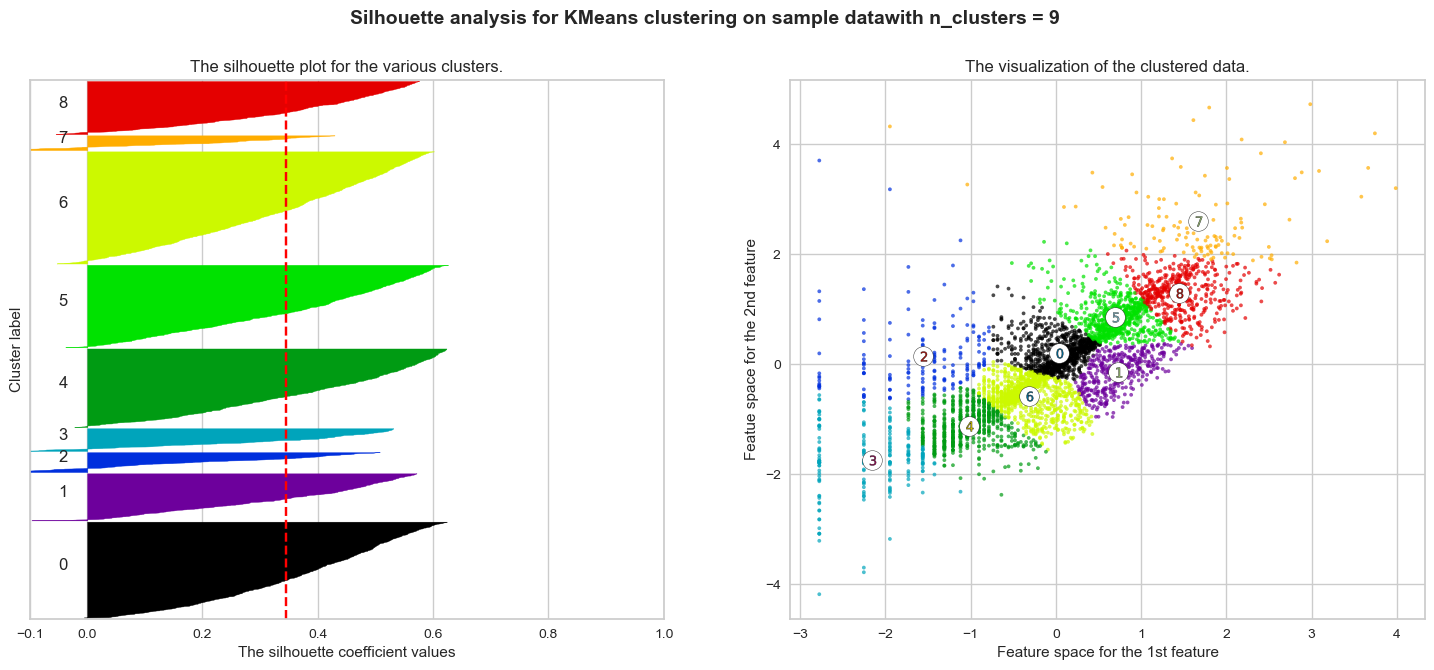

For n_clusters= 10 The average silhouette_score is : 0.36238664926507114


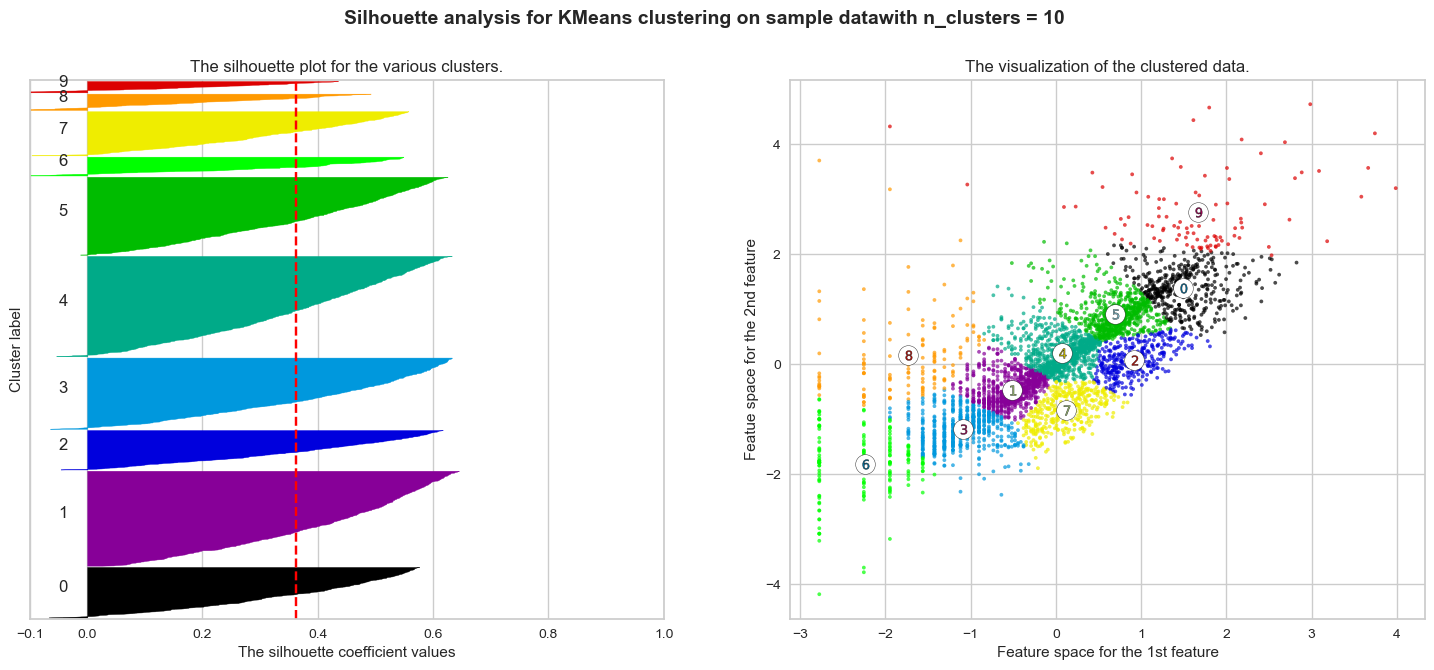

In [131]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters=", n_clusters,
         "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
           sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i= ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.") 
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker ='o', 
               c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                   s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Featue space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data"
                 "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')
    
    plt.show()

In [132]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [133]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon']=kmeans_freq_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetory  R  F  M RFM_Group  RFM_score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  1       441          9   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  2       442         10   
12354.0         232         58   1079.40  4  2  1       421          7   
12355.0         214         13    459.40  4  4  1       441          9   
12356.0          22         59   2811.43  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetory_log  \
CustomerID                                                               
12346.0                Bronz     5.783825       0.000000     11.253942   
12347.0             Platinum     0.693147       5.204007      8.368693   
12348.0               Silver     4.317488       3.433987      7.494007   
12349.0                 Gold     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0                 Gold     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0               Silver     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0                 Gold     3.091042       4.077537      7.941449   

            Cluster_based_on_freq_mon  
CustomerID                             
12346.0                             1  
12347.0                             1  
12348.0                             1  
12349.0                             1  
12350.0                             0  
12352.0                             1  
12353.0                             0  
12354.0                             1  
12355.0                             0  
12356.0                             1

In [134]:
#Centers of the clusters(coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[-0.70535589, -0.71244356],
       [ 0.79016407,  0.79810393]])

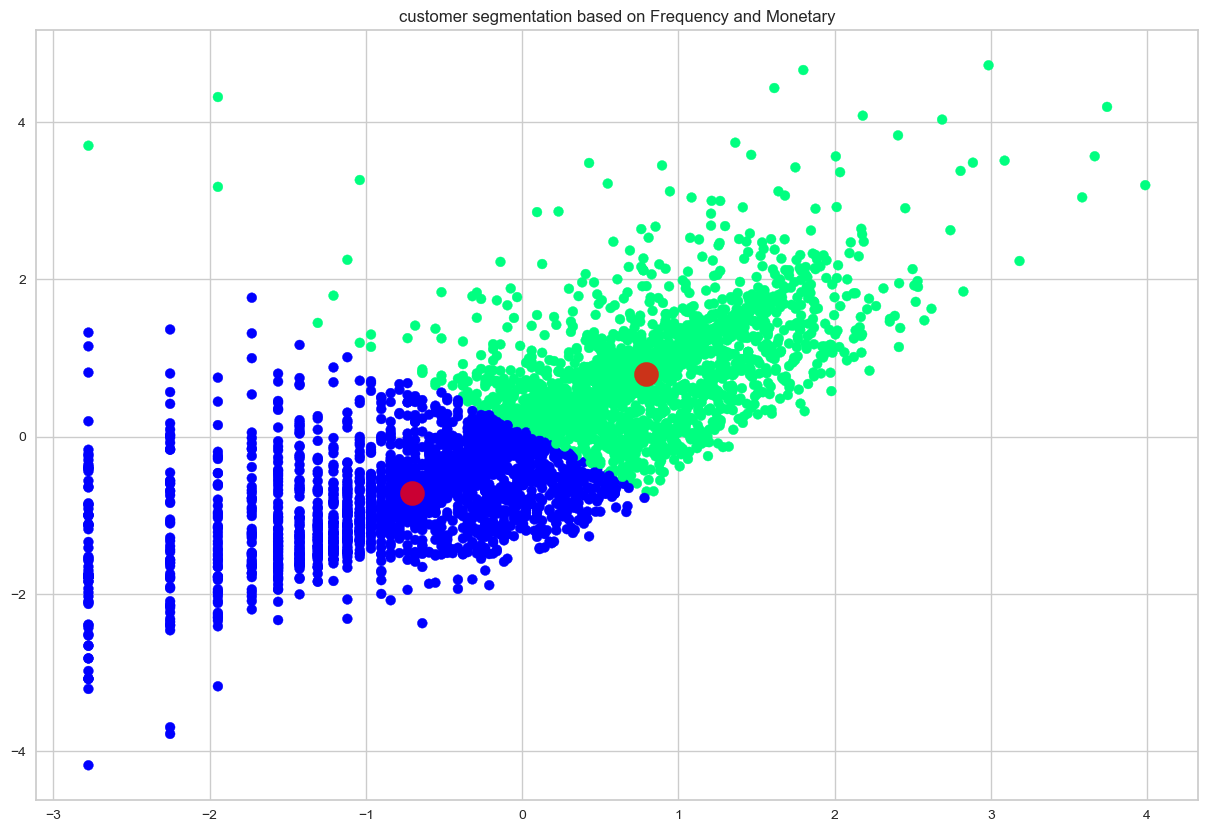

In [135]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0],X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

## DBSCAN

In [139]:
db=DBSCAN(eps=0.5, min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" %silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 47
Silhouette Coefficient: 0.426


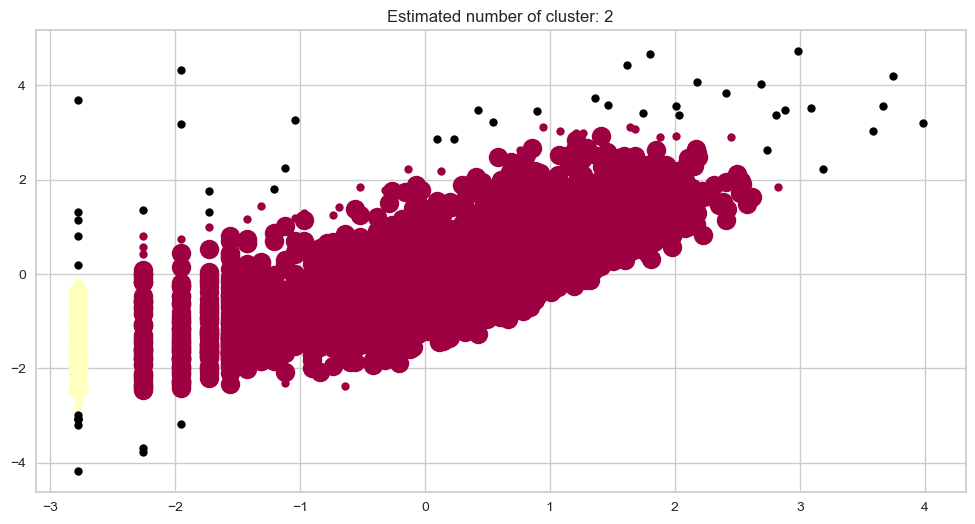

In [140]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = labels ==k
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    plt.title("Estimated number of cluster: %d" % n_clusters_)
    
plt.show()

## --------Recency,Frequency and Monetory--------

## Kmeans Clustering

## 1.Applying Elbow method on Recency,Frequency and Monetory

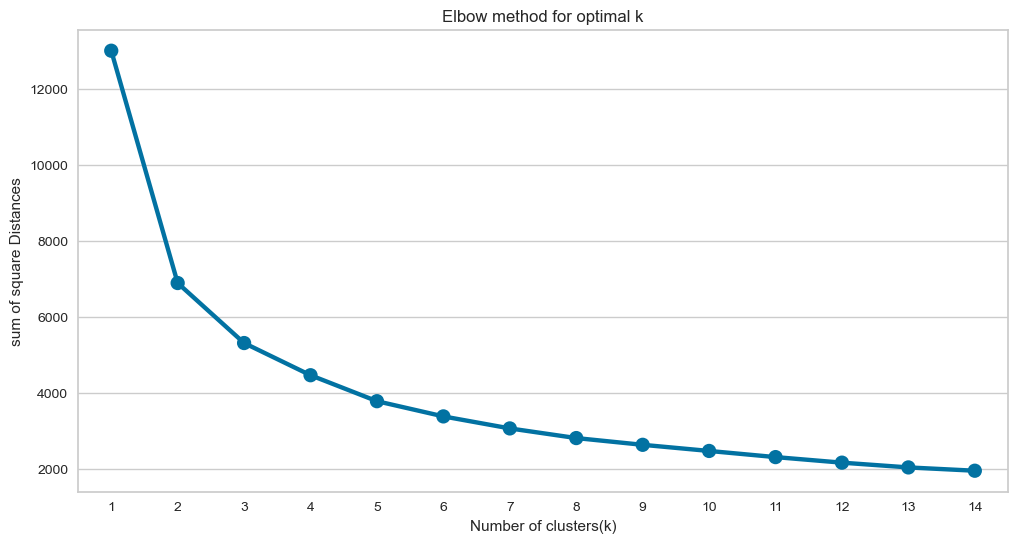

In [141]:
Recency_Frequency_and_Monetory_feat=['Recency_log','Frequency_log','Monetory_log']

x=rfm_dataframe[Recency_Frequency_and_Monetory_feat].values

scaler=StandardScaler()
x=scaler.fit_transform(x)

wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter = 1000)
    km = km.fit(x)
    wcss[k] = km.inertia_
    
plt.figure(figsize=(12,6))    
sns.pointplot(x= list(wcss.keys()),y = list(wcss.values()))
plt.xlabel('Number of clusters(k)')
plt.ylabel('sum of square Distances')
plt.title('Elbow method for optimal k')
plt.show()

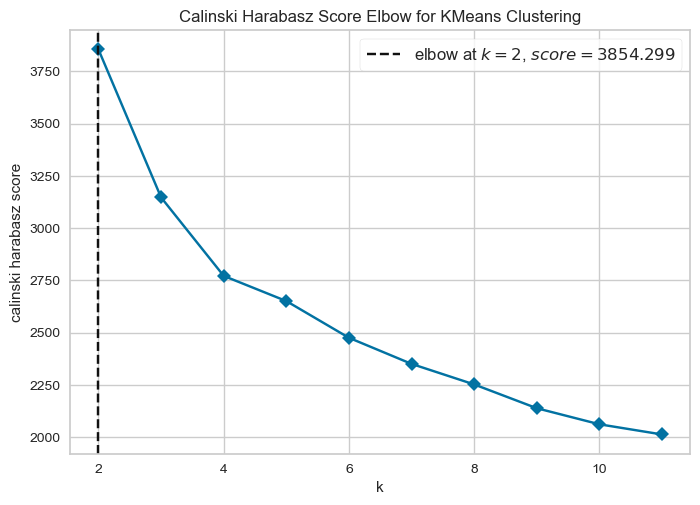

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [142]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(
   model, k=(2,12), metric='calinski_harabasz', timings=False
)
visualizer.fit(x)
visualizer.show()

In [143]:
Recency_Frequency_and_Monetory_feat=['Recency_log','Frequency_log','Monetory_log']
x=rfm_dataframe[Recency_Frequency_and_Monetory_feat].values
scaler=StandardScaler()
X=scaler.fit_transform(x)
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer= KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers= clusterer.cluster_centers_
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is{}".format(n_clusters, score))

For n_clusters = 2, silhouette score is0.39597280345877467
For n_clusters = 3, silhouette score is0.30306623428198437
For n_clusters = 4, silhouette score is0.30188282895683416
For n_clusters = 5, silhouette score is0.2787783127811271
For n_clusters = 6, silhouette score is0.2789560652501828
For n_clusters = 7, silhouette score is0.26251570956441783
For n_clusters = 8, silhouette score is0.26604516508252274
For n_clusters = 9, silhouette score is0.25334399829461035
For n_clusters = 10, silhouette score is0.2594507943913136
For n_clusters = 11, silhouette score is0.261084644577631
For n_clusters = 12, silhouette score is0.2630954807140074
For n_clusters = 13, silhouette score is0.2629821003752366
For n_clusters = 14, silhouette score is0.26165526187324323
For n_clusters = 15, silhouette score is0.2561927031281945


For n_clusters= 2 The average silhouette_score is : 0.39597280345877467


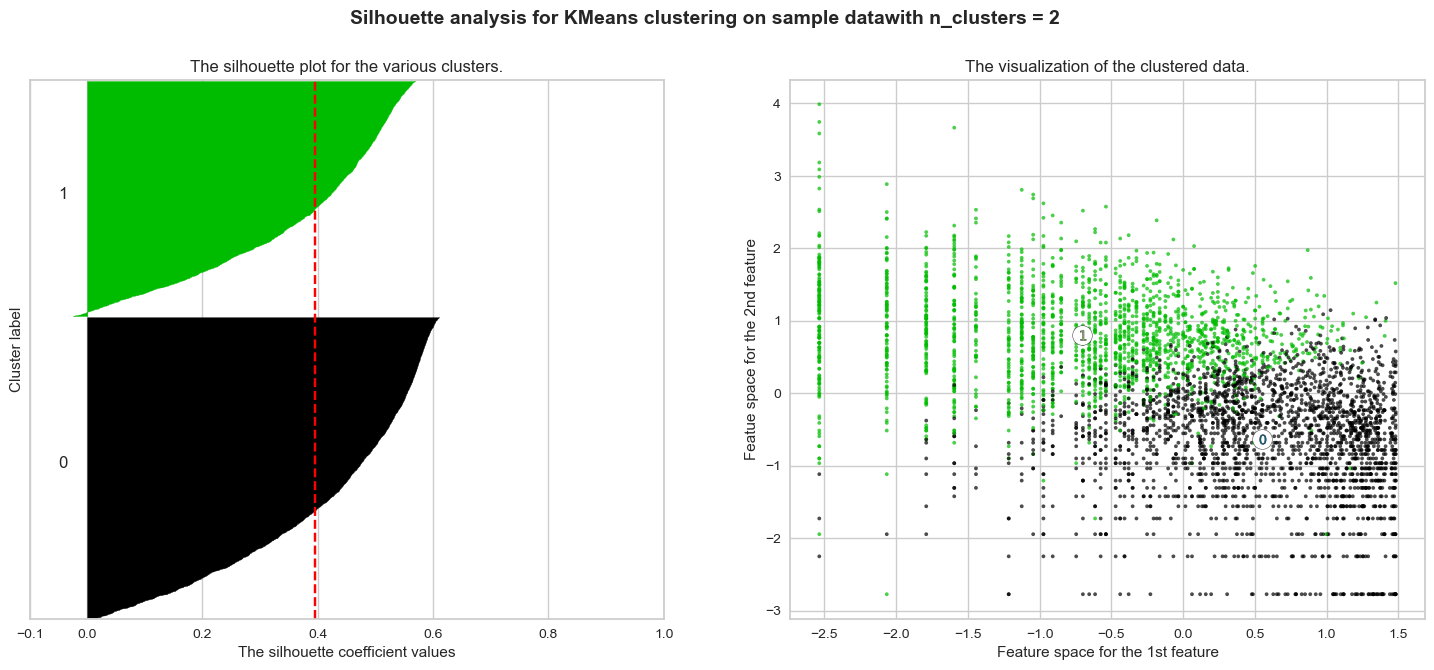

For n_clusters= 3 The average silhouette_score is : 0.30306623428198437


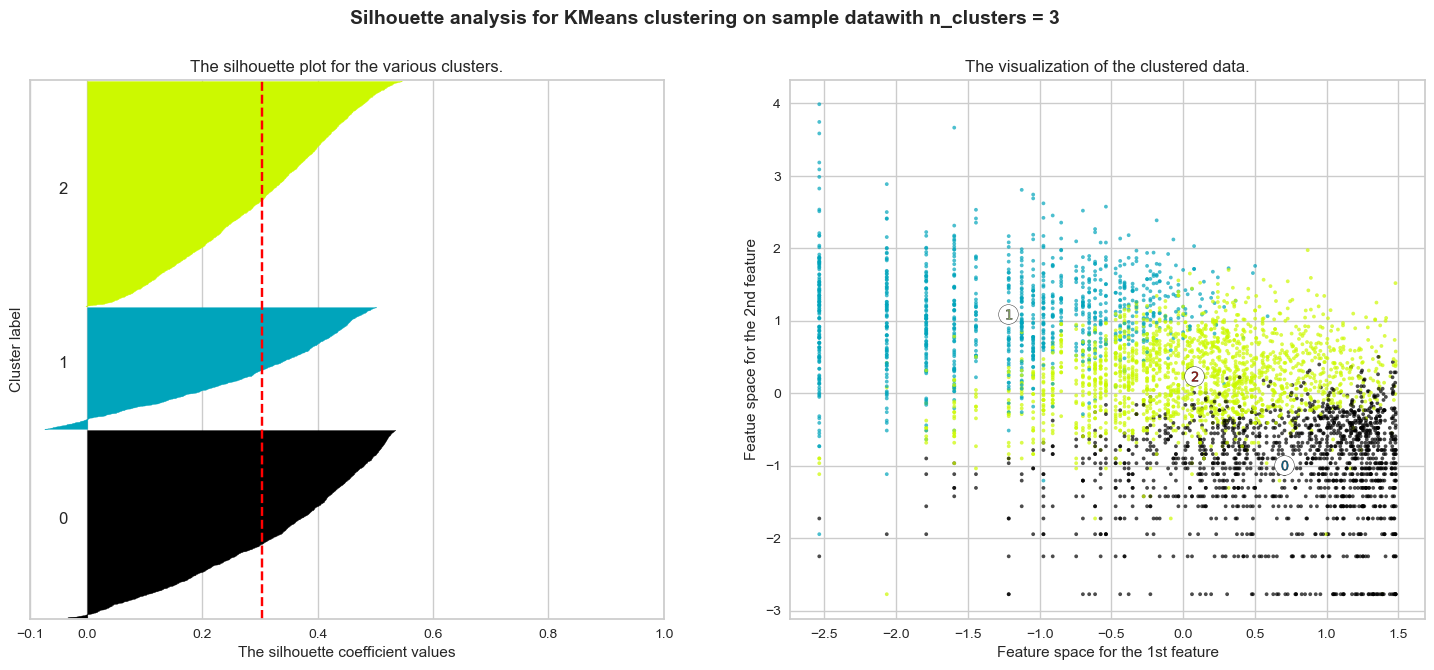

For n_clusters= 4 The average silhouette_score is : 0.30188282895683416


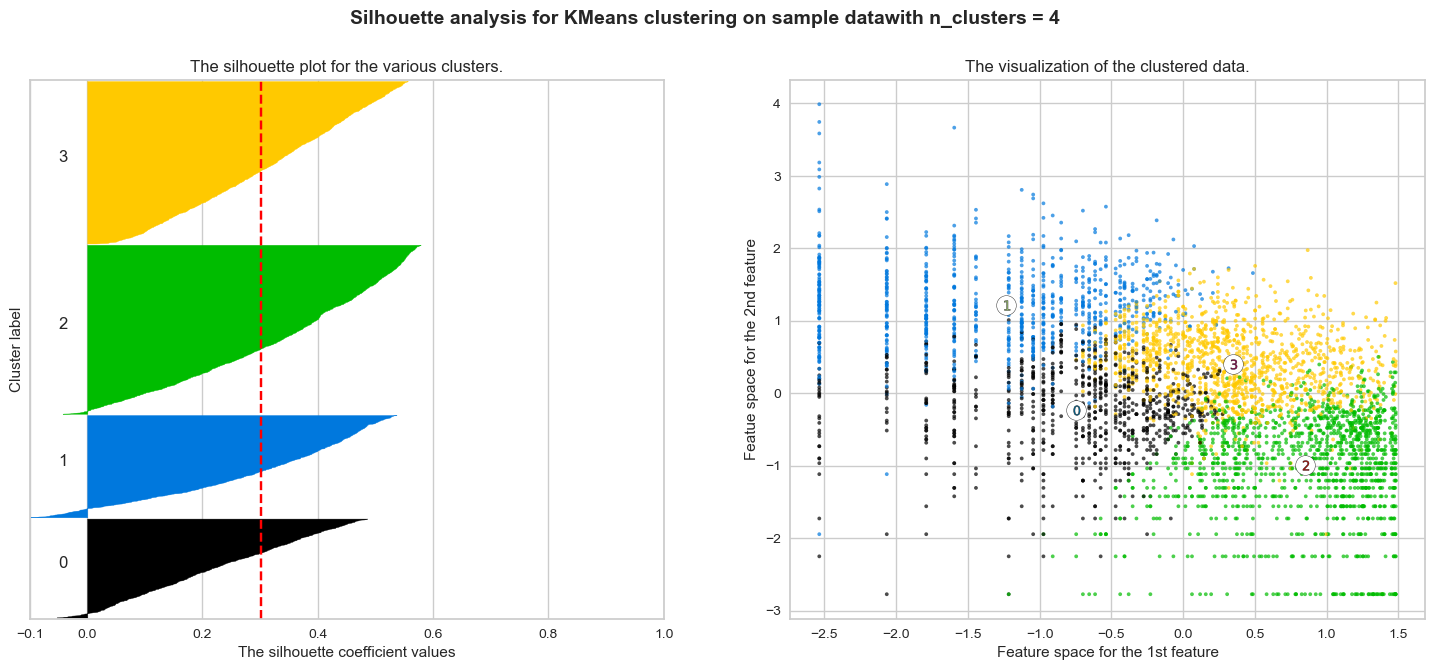

For n_clusters= 5 The average silhouette_score is : 0.2787783127811271


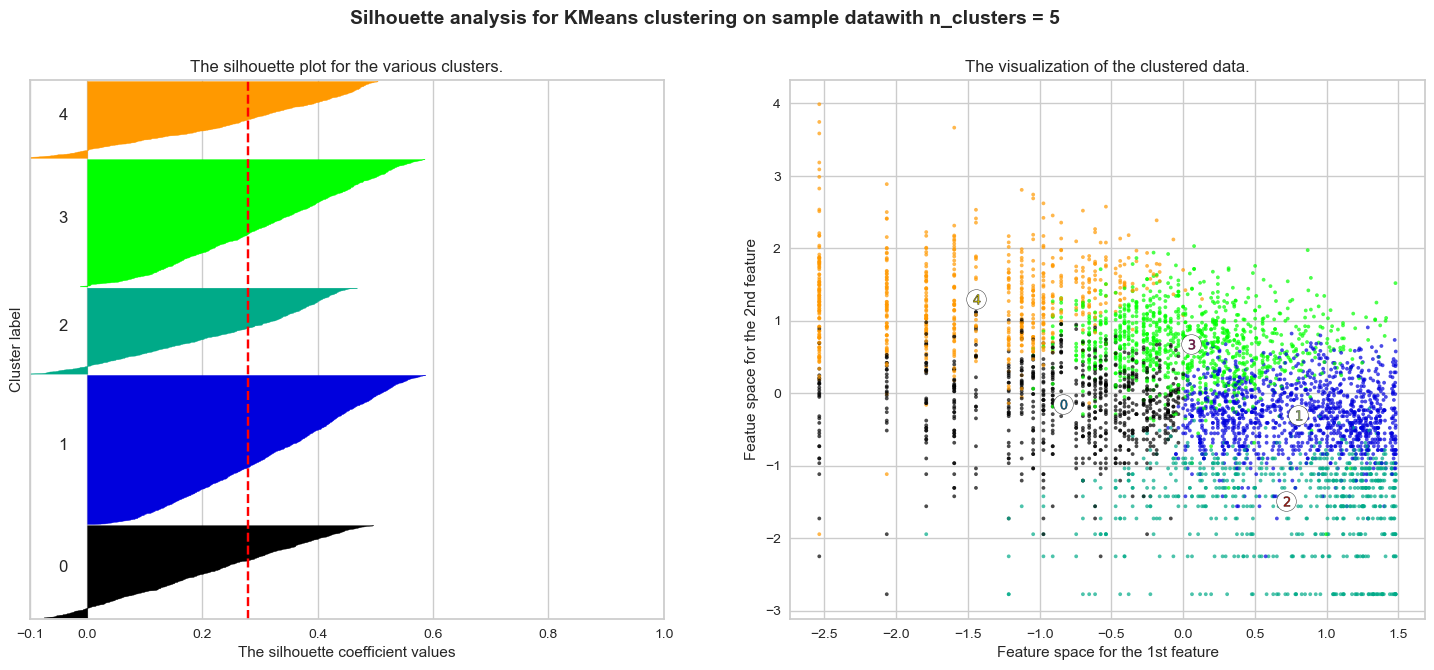

For n_clusters= 6 The average silhouette_score is : 0.2789560652501828


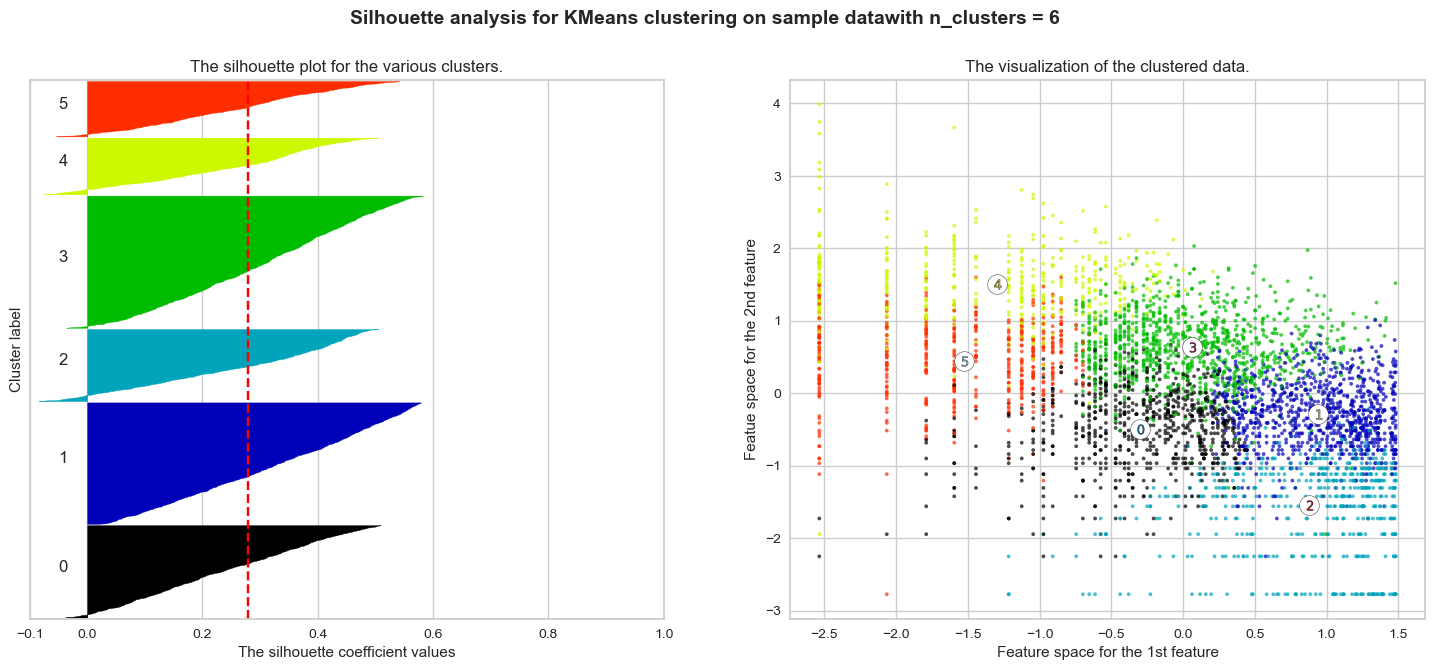

For n_clusters= 7 The average silhouette_score is : 0.26251570956441783


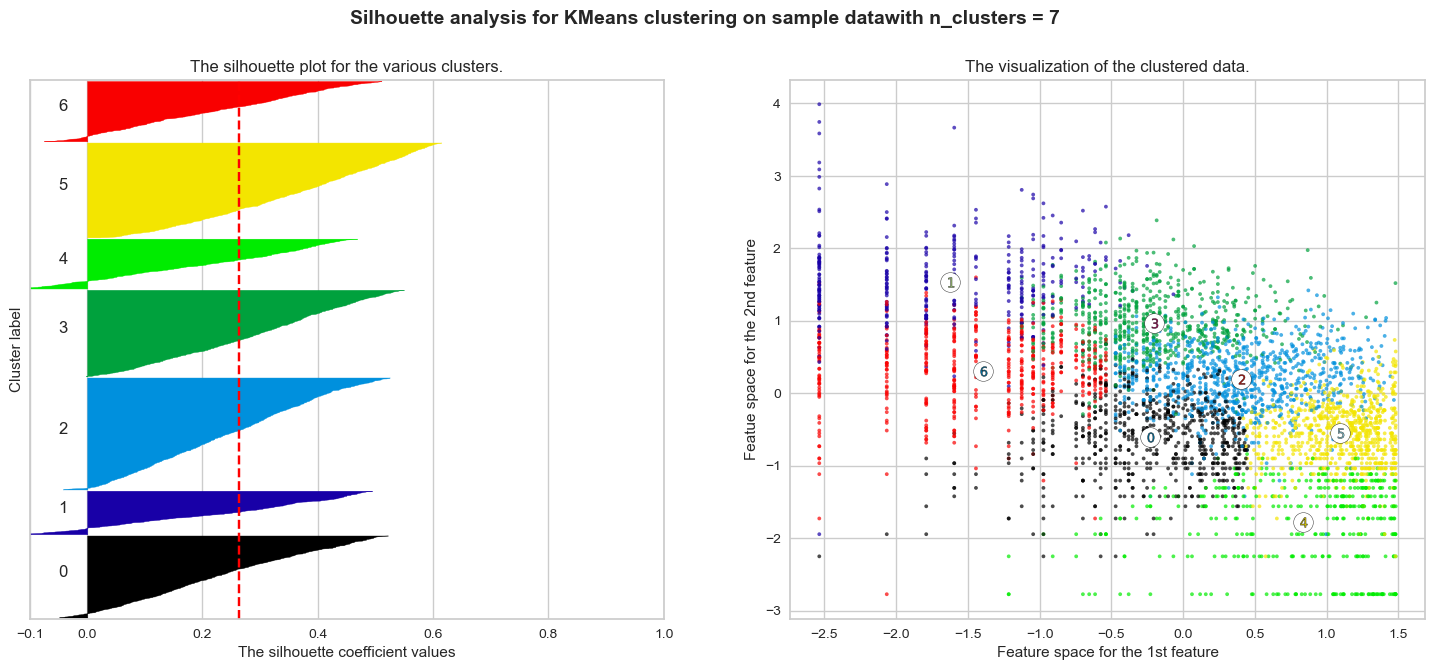

For n_clusters= 8 The average silhouette_score is : 0.26604516508252274


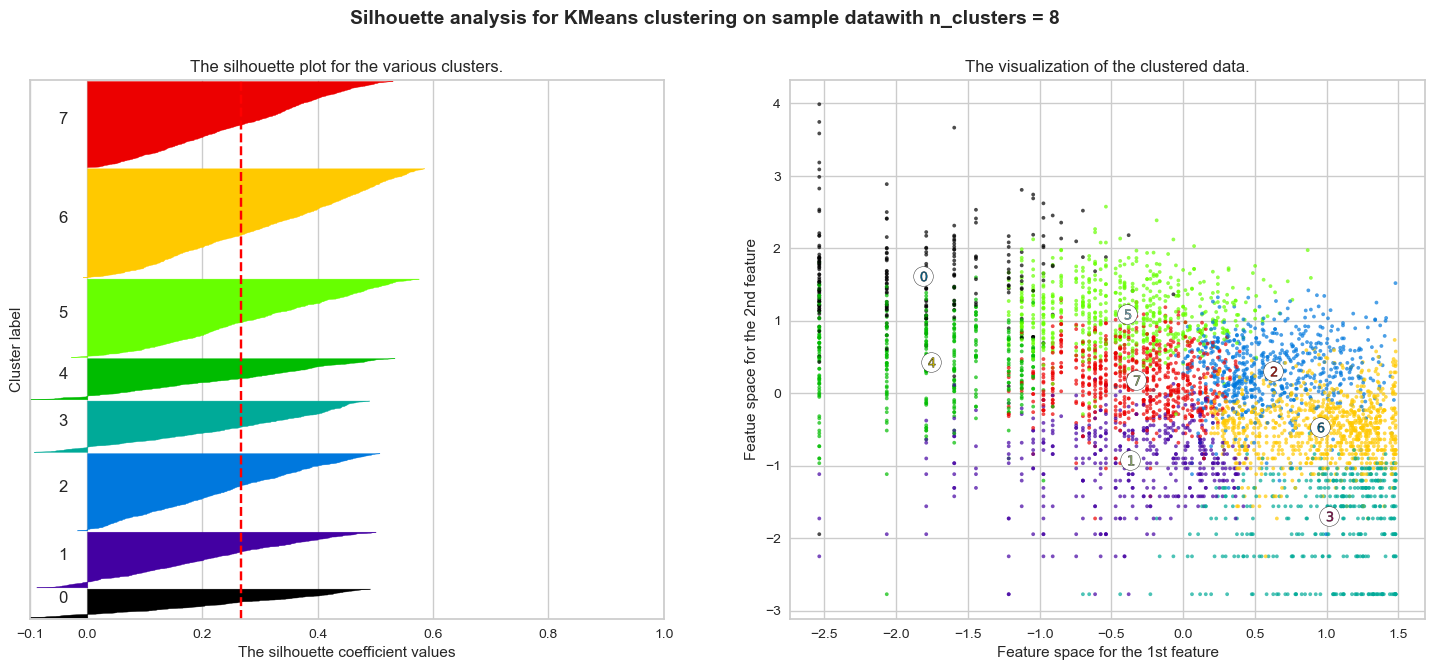

For n_clusters= 9 The average silhouette_score is : 0.25334399829461035


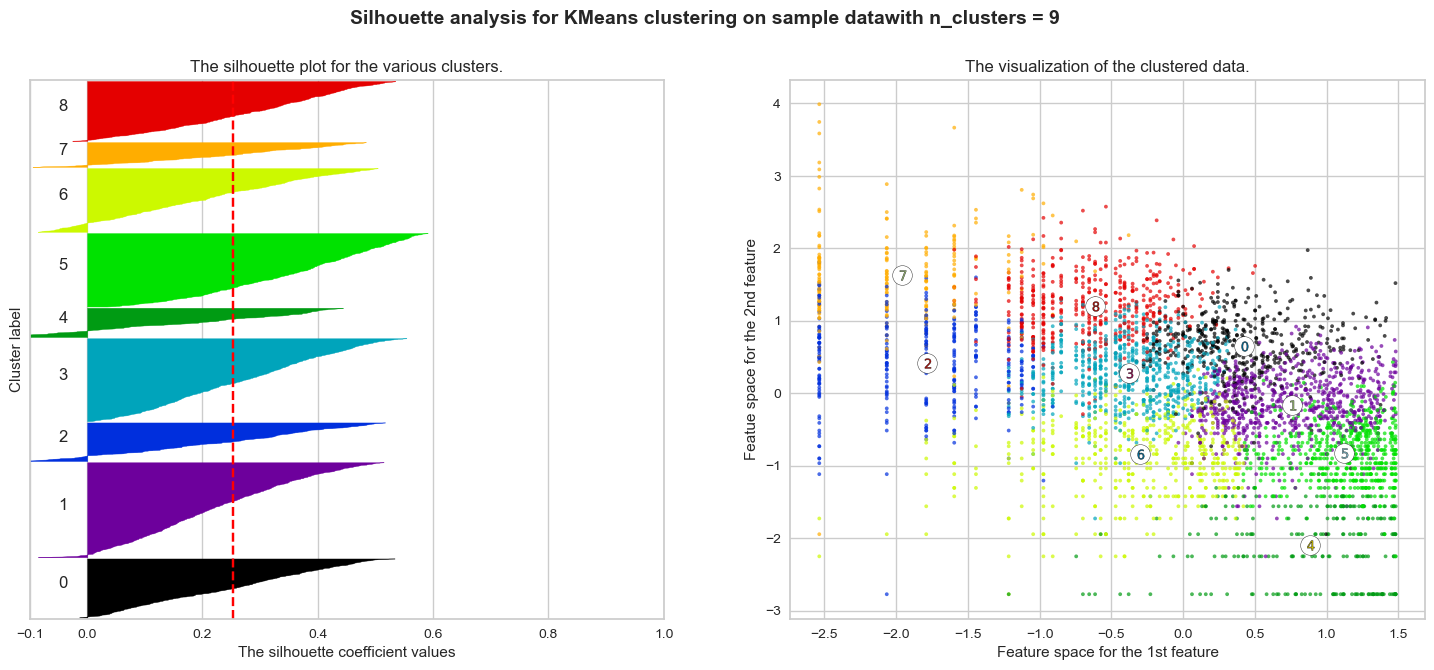

For n_clusters= 10 The average silhouette_score is : 0.2594507943913136


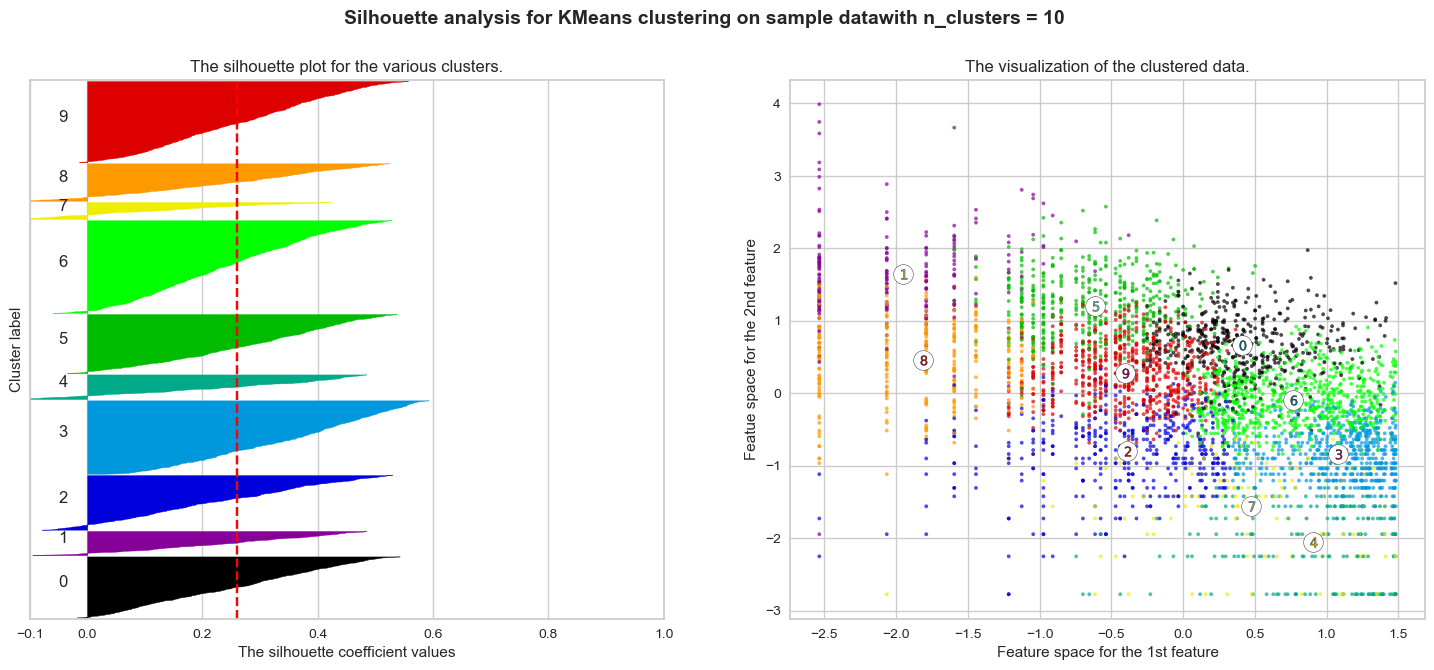

In [144]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters=", n_clusters,
         "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
           sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i= ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.") 
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker ='o', 
               c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                   s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Featue space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data"
                 "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')
    
    plt.show()

In [145]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [146]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon']=kmeans_freq_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetory  R  F  M RFM_Group  RFM_score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  1       441          9   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  2       442         10   
12354.0         232         58   1079.40  4  2  1       421          7   
12355.0         214         13    459.40  4  4  1       441          9   
12356.0          22         59   2811.43  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetory_log  \
CustomerID                                                               
12346.0                Bronz     5.783825       0.000000     11.253942   
12347.0             Platinum     0.693147       5.204007      8.368693   
12348.0               Silver     4.317488       3.433987      7.494007   
12349.0                 Gold     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0                 Gold     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0               Silver     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0                 Gold     3.091042       4.077537      7.941449   

            Cluster_based_on_freq_mon  
CustomerID                             
12346.0                             0  
12347.0                             1  
12348.0                             0  
12349.0                             1  
12350.0                             0  
12352.0                             1  
12353.0                             0  
12354.0                             0  
12355.0                             0  
12356.0                             1

In [147]:
#Centers of the clusters(coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[ 0.55327398, -0.6446725 , -0.64591361],
       [-0.68580838,  0.79910102,  0.80063943]])

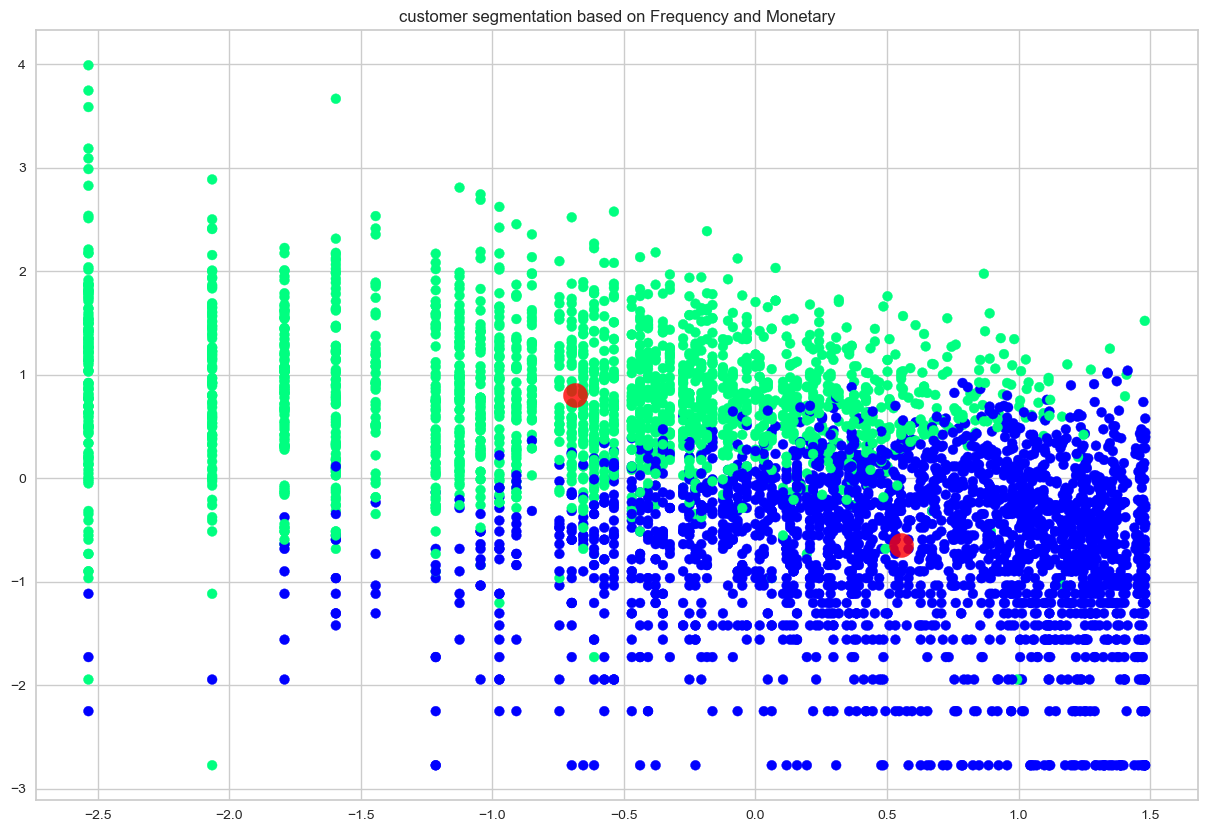

In [148]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0],X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

## DBSCAN for Recency,Frequency and Monetory

In [149]:
db=DBSCAN(eps=0.5, min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" %silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 200
Silhouette Coefficient: 0.273


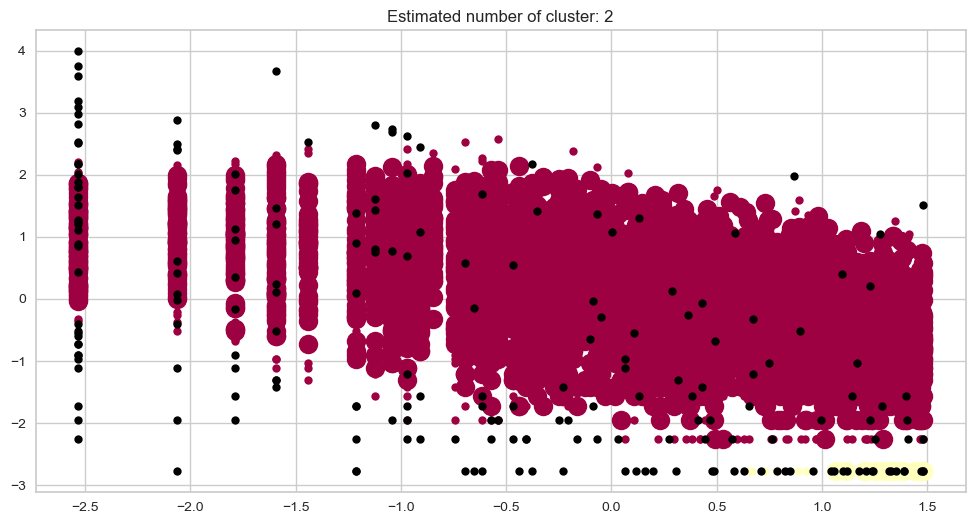

In [150]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = labels ==k
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    plt.title("Estimated number of cluster: %d" % n_clusters_)
    
plt.show()

## --------------------------------------------------------------------------------

# Hierarchical Clustering

In [151]:
import scipy.cluster.hierarchy as sch

In [ ]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
# fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = h_clustering.fit_predict(X)

In [ ]:
#Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.xlabel('RFM')
plt.legend()
plt.show()

In [ ]:
rfm_dataframe.head(1)

In [ ]:
data_process_normalized=rfm_dataframe[['Recency','Frequency','Monetory','Recency_log','Frequency_log','Monetory_log','RFM_Loyalty_Level','Cluster_based_on_freq_mon']]

In [ ]:
data_process_normalized.groupby('Cluster_based_on_freq_mon').agg({
     'Recency':['mean','min','max'],
     'Frequency':['mean','min','max'],
     'Monetory':['mean','min','max','count']
})